# <center>Telecom Churn Case Study

## Step 1: Importing Libraries and Reading Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings('ignore')

F:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
telecom = pd.read_csv("telecom_churn_data.csv")
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

##### Getting idea about shape of Dataframe:

In [3]:
telecom.shape

(99999, 226)

##### Checking Data Types of columns:

In [4]:
telecom.dtypes

mobile_number                 int64
circle_id                     int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6         object
last_date_of_month_7         object
last_date_of_month_8         object
last_date_of_month_9         object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

##### Missing values:

In [5]:
round(100 * telecom.isnull().sum()/telecom.shape[0], 2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

Here, we can see that a lot of columns have missing values even few have around **75 %** of misisng values. As per the **Problem Statement**, we have to predict churn about **High-Value Customers** using **usage-based churn**.
So, to find high-valued customers, it is important to pay attention on below columns on 6th and 7th months:
- total_rech_data_6
- total_rech_data_7
- av_rech_amt_data_6
- av_rech_amt_data_7

Here, missing value indicates that there was no recharge done. So, we can safely replace missing values of these columns first with **0.** The same concept we can apply for the **8th month** missing data.Let's do it now.

In [6]:
#6th Month:
telecom['total_rech_data_6'] = telecom['total_rech_data_6'].fillna(0)
telecom['av_rech_amt_data_6'] = telecom['av_rech_amt_data_6'].fillna(0)

#7th Month:
telecom['total_rech_data_7'] = telecom['total_rech_data_7'].fillna(0)
telecom['av_rech_amt_data_7'] = telecom['av_rech_amt_data_7'].fillna(0)

#8th Month:
telecom['total_rech_data_8'] = telecom['total_rech_data_8'].fillna(0)
telecom['av_rech_amt_data_8'] = telecom['av_rech_amt_data_8'].fillna(0)

There are recharge related columns for 9th month as well, but we are not touching it now. After all we have to remove columns related to 9th month after deriving the churn.

##### Let's see the missing value percentage again:

In [7]:
round(100 * telecom.isnull().sum()/telecom.shape[0], 2).sort_values(ascending=False)

night_pck_user_6            74.85
fb_user_6                   74.85
count_rech_3g_6             74.85
max_rech_data_6             74.85
date_of_last_rech_data_6    74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
count_rech_2g_6             74.85
fb_user_7                   74.43
date_of_last_rech_data_7    74.43
count_rech_2g_7             74.43
count_rech_3g_7             74.43
night_pck_user_7            74.43
arpu_3g_7                   74.43
max_rech_data_7             74.43
arpu_2g_7                   74.43
arpu_2g_9                   74.08
max_rech_data_9             74.08
night_pck_user_9            74.08
fb_user_9                   74.08
total_rech_data_9           74.08
date_of_last_rech_data_9    74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_9             74.08
arpu_3g_9                   74.08
date_of_last_rech_data_8    73.66
max_rech_data_8             73.66
arpu_3g_8                   73.66
count_rech_3g_

## Step 2: Data Preparation

##### Deriving New Feature:

We have "total_rech_data" and "av_rech_amt_data" columns available for 6th, 7th, 8th and 9th months. We can derive new fetures for total recharge amount for data using these 2 features as below:

**total_rech_amt_data = total_rech_data  *  av_rech_amt_data**

Let's do it for all 4 months:

In [8]:
telecom['total_rech_amt_data_6'] = telecom['total_rech_data_6'] * telecom['av_rech_amt_data_6']
telecom['total_rech_amt_data_7'] = telecom['total_rech_data_7'] * telecom['av_rech_amt_data_7']
telecom['total_rech_amt_data_8'] = telecom['total_rech_data_8'] * telecom['av_rech_amt_data_8']
telecom['total_rech_amt_data_9'] = telecom['total_rech_data_9'] * telecom['av_rech_amt_data_9']

##### Finding High Value Customers:

High Value Customers are those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (6th and 7th).

Let's first calculate total recharge amount (call and data) for both 6th and 7th months:

In [9]:
# For 6th Month:
telecom['Total_Recharge_call_and_data_6'] = telecom['total_rech_amt_6'] + telecom['total_rech_amt_data_6']

# For 7th Month
telecom['Total_Recharge_call_and_data_7'] = telecom['total_rech_amt_7'] + telecom['total_rech_amt_data_7']

##### Now, let's Find average recharge of 6th and 7th months:

In [10]:
telecom['Avg Recharge of 6-7 Month'] = (telecom['Total_Recharge_call_and_data_6'] + telecom['Total_Recharge_call_and_data_7'])/2
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,Total_Recharge_call_and_data_6,Total_Recharge_call_and_data_7,Avg Recharge of 6-7 Month
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,N

##### Now, it's time to calculate 70th percentile of this average data:

In [11]:
percentile_70 = telecom['Avg Recharge of 6-7 Month'].quantile(0.70)
print("70th percentile of avg recharge of 6th and 7th months is: {}". format(percentile_70))

70th percentile of avg recharge of 6th and 7th months is: 478.0


##### Filtering High Value Customers based on 70th percentile of avg recharge:

In [12]:
telecom = telecom.loc[telecom['Avg Recharge of 6-7 Month'] >= percentile_70, :]
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,Total_Recharge_call_and_data_6,Total_Recharge_call_and_data_7,Avg Recharge of 6-7 Month
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,

In [13]:
telecom.shape

(30001, 233)

In [14]:
telecom = telecom.reset_index(drop=True)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,Total_Recharge_call_and_data_6,Total_Recharge_call_and_data_7,Avg Recharge of 6-7 Month
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,

#### Tagging Churners:

As per the problem statement, those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. Taking 9th month columns which give stats about total incoming, outgoing and data usage. Below are the columns:

- total_ic_mou_9

- total_og_mou_9

- vol_2g_mb_9

- vol_3g_mb_9

In [15]:
usage_cols = ['total_og_mou_9', 'total_ic_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

##### Creating a column which calulates total sum of usage:

In [16]:
telecom['Total Usage in 9th Month'] = telecom[usage_cols].sum(axis=1)

##### Tagging churn as 1 for total usage 0:

In [17]:
telecom['Churn'] = telecom['Total Usage in 9th Month'].apply(lambda x: 1 if x == 0 else 0)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_rech_amt_data_9,Total_Recharge_call_and_data_6,Total_Recharge_call_and_data_7,Avg Recharge of 6-7 Month,Total Usage in 9th Month,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN

In [18]:
telecom.shape

(30001, 235)

##### Removing all the columns related to 9th months because these will not contribute in prediction while building model:

##### Creating a DataFrame "df_9" which contains all the 9th month columns:

In [19]:
df_9 = telecom.loc[:, ((telecom.columns.str.contains('_9')))]
df_9.head()

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,loc_og_mou_9,std_og_t2t_mou_9,std_og_t2m_mou_9,std_og_t2f_mou_9,std_og_t2c_mou_9,std_og_mou_9,isd_og_mou_9,spl_og_mou_9,og_others_9,total_og_mou_9,loc_ic_t2t_mou_9,loc_ic_t2m_mou_9,loc_ic_t2f_mou_9,loc_ic_mou_9,std_ic_t2t_mou_9,std_ic_t2m_mou_9,std_ic_t2f_mou_9,std_ic_t2o_mou_9,std_ic_mou_9,total_ic_mou_9,spl_ic_mou_9,isd_ic_mou_9,ic_others_9,total_rech_num_9,total_rech_amt_9,max_rech_amt_9,date_of_last_rech_9,last_day_rch_amt_9,date_of_last_rech_data_9,total_rech_data_9,max_rech_data_9,count_rech_2g_9,count_rech_3g_9,av_rech_amt_data_9,vol_2g_mb_9,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9,total_rech_amt_data_9
0,9/30/2014,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,6,0,0,9/28/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,NaN
1,9/30/2014,500.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,3,0,0,9/30/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,NaN
2,9/30/2014,166.787,33.46,108.71,0.0,0.0,26.13,34.58,0.00,0.00,60.71,7.33,74.13,0.00,0.0,81.46,0.0,0.00,0.0,142.18,4.03,17.34,0.00,21.38,0.00,13.53,0.0,0.0,13.53,34.91,0.0,0.0,0.0,15,186,36,9/30/2014,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,NaN
3,9/30/2014,578.596,161.63,869.89,0.0,0.0,29.98,107.54,0.00,0.00,137.53,131.64,762.34,0.00,0.0,893.99,0.0,0.00,0.0,1031.53,17.99,113.46,8.41,139.88,16.74,95.98,0.0,0.0,112.73,252.61,0.0,0.0,0.0,17,680,50,9/30/2014,30,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,0,0,0,0,NaN,NaN
4,9/30/2014,811.480,15.74,111.88,0.0,0.0,15.74,83.73,2.45,4.08,101.93,0.00,11.44,3.89,0.0,15.34,0.0,10.35,0.0,127.63,45.36,75.83,0.00,121.19,1.08,5.20,0.0,0.0,6.28,127.48,0.0,0.0,0.0,4,252,252,9/28/2014,0,9/9/2014,1.0,252.0,0.0,1.0,252.0,13.93,314.74,212.17,212.17,0.0,0,0,1,0,1.0,252.0


##### Now, taking all the 9th month columns in a variable:

In [20]:
cols_9 = list(df_9.columns)

##### Removing all the 9th month columns:

In [21]:
telecom = telecom.drop(columns=cols_9)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Total_Recharge_call_and_data_6,Total_Recharge_call_and_data_7,Avg Recharge of 6-7 Month,Total Usage in 9th Month,Churn
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,6/21/2014,7/16/2014,8/8/2014,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,559.0,0.00,1
1,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.

In [22]:
telecom.shape

(30001, 180)

##### As churn has already been tagged, we can remove columns "Avg Recharge of 6-7 Month" and "Total Usage in 9th Month" as well:

In [23]:
telecom = telecom.drop(columns=['Avg Recharge of 6-7 Month', 'Total Usage in 9th Month'])

Let's get back to remaining Data Cleaning part.

## Step 3: Data Cleaning

There are now total 9 date columns. We cannot impute misisng values for date columns. So, it's better to remove thses columns because these will not contribute anything in analysis. Below are the date columns:

- 6th Month
    - date_of_last_rech_data_6
    - last_date_of_month_6
    - date_of_last_rech_6
- 7th Month
    - date_of_last_rech_data_7
    - last_date_of_month_7
    - date_of_last_rech_7
- 8th Month
    - date_of_last_rech_data_8
    - last_date_of_month_8
    - date_of_last_rech_8

Let's remove theses columns.

In [24]:
telecom = telecom.drop(columns=['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'])

##### Re-checkig missing values:

In [25]:
round(100 * telecom.isnull().sum()/telecom.shape[0], 2).sort_values(ascending=False)

fb_user_8                         46.83
arpu_2g_8                         46.83
night_pck_user_8                  46.83
count_rech_3g_8                   46.83
arpu_3g_8                         46.83
count_rech_2g_8                   46.83
max_rech_data_8                   46.83
count_rech_3g_6                   44.15
night_pck_user_6                  44.15
arpu_3g_6                         44.15
fb_user_6                         44.15
arpu_2g_6                         44.15
count_rech_2g_6                   44.15
max_rech_data_6                   44.15
fb_user_7                         43.15
arpu_3g_7                         43.15
night_pck_user_7                  43.15
arpu_2g_7                         43.15
count_rech_3g_7                   43.15
max_rech_data_7                   43.15
count_rech_2g_7                   43.15
loc_og_t2c_mou_8                   3.91
loc_og_t2f_mou_8                   3.91
ic_others_8                        3.91
loc_og_t2m_mou_8                   3.91


After looking at remaining columns, it seems customers did not use services that's why data are missing. It is good to replace all the missing values with **0**. Let's do it now.

In [26]:
telecom = telecom.fillna(0)

##### Re-checking missing values:

In [27]:
round(100 * telecom.isnull().sum()/telecom.shape[0], 2).sort_values(ascending=False)

Churn                             0.0
isd_og_mou_8                      0.0
total_og_mou_7                    0.0
total_og_mou_6                    0.0
og_others_8                       0.0
og_others_7                       0.0
og_others_6                       0.0
spl_og_mou_8                      0.0
spl_og_mou_7                      0.0
spl_og_mou_6                      0.0
isd_og_mou_7                      0.0
std_ic_t2o_mou_6                  0.0
isd_og_mou_6                      0.0
std_og_mou_8                      0.0
std_og_mou_7                      0.0
std_og_mou_6                      0.0
std_og_t2c_mou_8                  0.0
std_og_t2c_mou_7                  0.0
std_og_t2c_mou_6                  0.0
std_og_t2f_mou_8                  0.0
total_og_mou_8                    0.0
loc_ic_t2t_mou_6                  0.0
loc_ic_t2t_mou_7                  0.0
loc_ic_t2t_mou_8                  0.0
std_ic_t2f_mou_7                  0.0
std_ic_t2f_mou_6                  0.0
std_ic_t2m_m

Now, all the missing values have been treated.

In [28]:
telecom.shape

(30001, 169)

##### Renaming columns:

There are 4 columns which need to be renamed because these contain month name instead of month number. Below are columns:


- jun_vbc_3g
- jul_vbc_3g
- aug_vbc_3g
- sep_vbc_3g

In [29]:
telecom = telecom.rename(columns={'jun_vbc_3g' : 'vbc_3g_6', 'jul_vbc_3g' : 'vbc_3g_7', 'aug_vbc_3g' : 'vbc_3g_8', 'sep_vbc_3g' : 'vbc_3g_9'})

##### Removing the column "vbc_3g_9" as it belongs to 9th month:

In [30]:
telecom = telecom.drop('vbc_3g_9', axis=1)

In [31]:
telecom.shape

(30001, 168)

##### Removing "circle_id", "mobile_number", "Total_Recharge_call_and_data_6" and "Total_Recharge_call_and_data_7" columns as well, these don't contribute anything in analysis:

In [32]:
telecom = telecom.drop(columns=['mobile_number', 'circle_id', 'Total_Recharge_call_and_data_6', 'Total_Recharge_call_and_data_7'])

In [33]:
telecom.shape

(30001, 164)

##### Converting float columns to categorical form:

Below 6 columns are having 2 values; 0 and 1. But, these are represented as float columns. We can convert them into int to show them as **Ordinal Category** column:
- night_pck_user_6
- night_pck_user_6
- night_pck_user_6
- fb_user_6
- fb_user_7
- fb_user_8

In [34]:
telecom['night_pck_user_6'] = telecom['night_pck_user_6'].astype('int64')
telecom['night_pck_user_7'] = telecom['night_pck_user_7'].astype('int64')
telecom['night_pck_user_8'] = telecom['night_pck_user_8'].astype('int64')
telecom['fb_user_6'] = telecom['fb_user_6'].astype('int64')
telecom['fb_user_7'] = telecom['fb_user_7'].astype('int64')
telecom['fb_user_8'] = telecom['fb_user_8'].astype('int64')

In [35]:
telecom.shape

(30001, 164)

##### Getting stats of the data using describe():

In [36]:
telecom.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn
count,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.0,30001.0,30001.0,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000

As per above description, we see that below columns have all the value **0**:
- loc_og_t2o_mou
- std_og_t2o_mou
- loc_ic_t2o_mou
- std_og_t2c_mou_6
- td_og_t2c_mou_7
- std_og_t2c_mou_8
- std_ic_t2o_mou_6
- std_ic_t2o_mou_7
- std_ic_t2o_mou_8

Let's remove these columns.

In [37]:
single_cols = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6',
'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']
telecom = telecom.drop(columns=single_cols)

In [38]:
telecom.shape

(30001, 155)

##### Churn Percentage:

In [39]:
positive_churn = len(telecom[telecom['Churn'] == 1])
negative_churn = len(telecom[telecom['Churn'] == 0])
churn_percentage = round(100 * (len(telecom[telecom['Churn'] == 1])/len(telecom['Churn'])), 2)
print("Total number of Positive Churn: {}".format(positive_churn))
print("Total number of Negative Churn: {}".format(negative_churn))
print("Churn Percentage: {}".format(churn_percentage))

Total number of Positive Churn: 2441
Total number of Negative Churn: 27560
Churn Percentage: 8.14


**We can clearly see that there is a huge class imbalance in the churn data. We'll handle this later.**

##### Deriving some more new features:

The column `aon` shows Age on Network; means since how long the customer is using service of the company. Let's create binning on the column `aon` and generate a new column `Customer Type` based on the age on network. 

- **0 to 1500 days - New Customers**
- **1501 to 3000 days - Old Customers**
- **3001 to 4321 days - Very Old Customers**

In [40]:
telecom['aon'].describe()

count    30001.000000
mean      1209.368754
std        957.677989
min        180.000000
25%        460.000000
50%        846.000000
75%       1756.000000
max       4321.000000
Name: aon, dtype: float64

##### `aon` column is in `float`. Let's convert this  into `int` first:

In [41]:
telecom['aon'] = telecom['aon'].astype('int64')

##### Binning the column `aon` and creating new one `Customer Type` with labels `New Customers`, `Old Customers` and `Very Old Customers`:

In [42]:
telecom['Customer Type'] = pd.cut(telecom['aon'], bins= [0,1500,3000,4321], labels=['New Customers', 'Old Customers', 'Very Old Customers'])
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn,Customer Type
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1,New Customers
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1,New Customers
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,1

##### Let's get count of labels: 

In [43]:
telecom['Customer Type'].value_counts()

New Customers         21128
Old Customers          6752
Very Old Customers     2121
Name: Customer Type, dtype: int64

**From the above counts, `New Customers` are more in numbers and `Very Old Customers` are less.**

## Step 4: Data Visualization

##### Churn count Bar Plot:

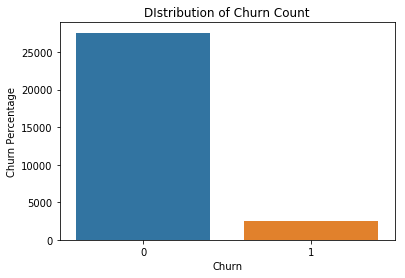

In [44]:
sns.countplot(telecom['Churn'])
plt.xlabel("Churn")
plt.ylabel("Churn Percentage")
plt.title("DIstribution of Churn Count")
plt.show()

From the above plot, it is visible that Churn with tag 1 are very less as compared to Churn with tag 0.

##### Churn Percentage Pie Chart:

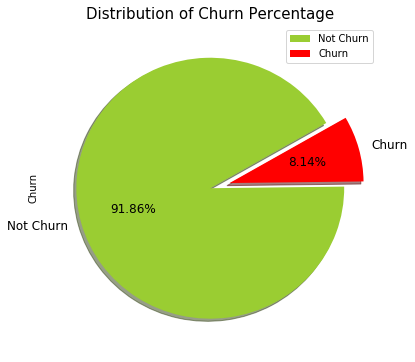

In [45]:
plt.figure(figsize=(6,6))
colors = ["yellowgreen", "red"]
labels ="Not Churn", "Churn"
telecom["Churn"].value_counts().plot.pie(explode=[0,0.15], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12, startangle=30)
plt.legend(loc='best')
plt.title("Distribution of Churn Percentage", fontsize=15)
plt.show()

From the above graphs, it is clear that there is high imbalance in Data. Churn tags are **7.93%** and Not Churn tags are **92.07%**.

### Univariate Analysis:

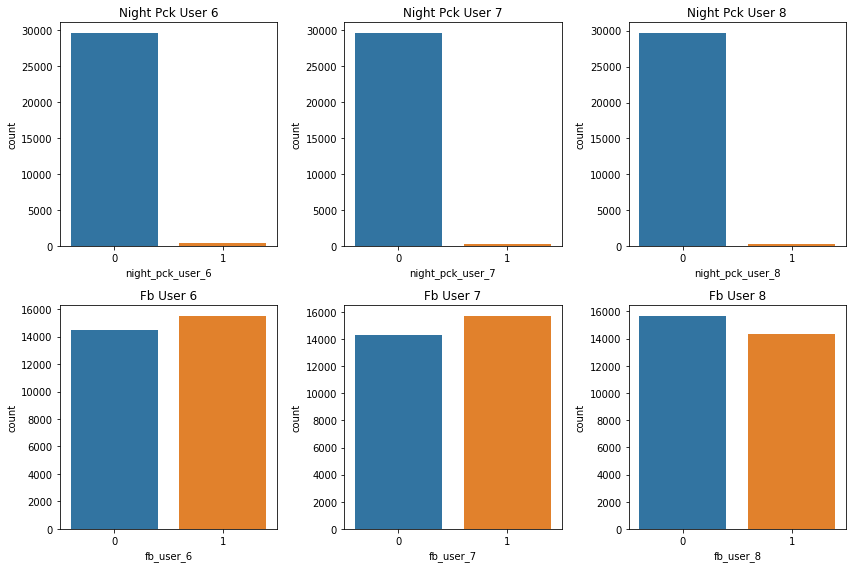

In [46]:
cat_col = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
plt.figure(figsize=(12,8))
for i in range (len(cat_col)):
    plt.subplot(2,3, i+1)
    sns.countplot(telecom[cat_col[i]])
    plt.xlabel(cat_col[i])
    plt.title(" ".join(cat_col[i].split('_')).title())
    plt.tight_layout()   

From the above graphs, we can interpret that there is no effect on Night Pack Users, but FB Users are showing comparitively less interest in 8th month.

### Bivariate Analysis:

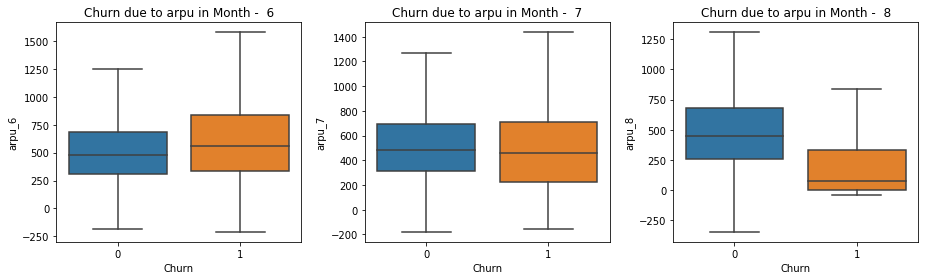

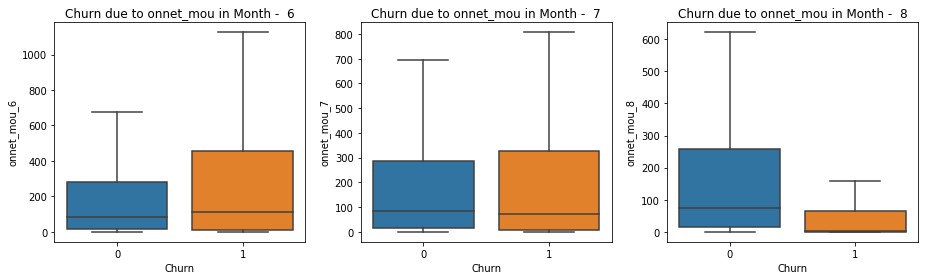

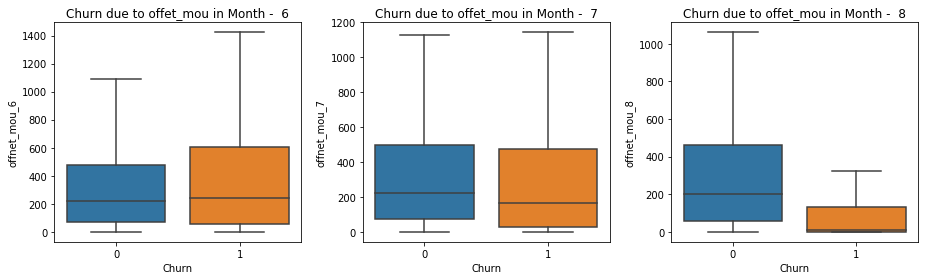

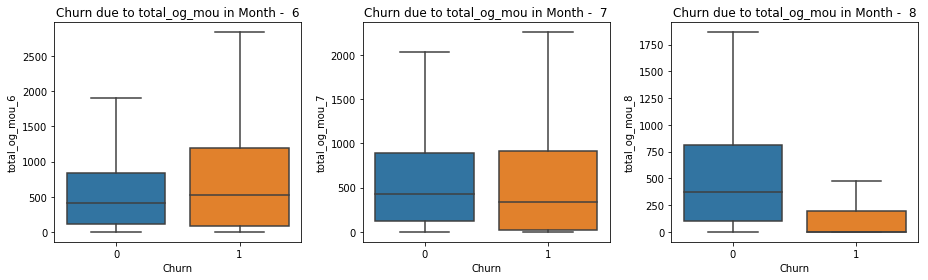

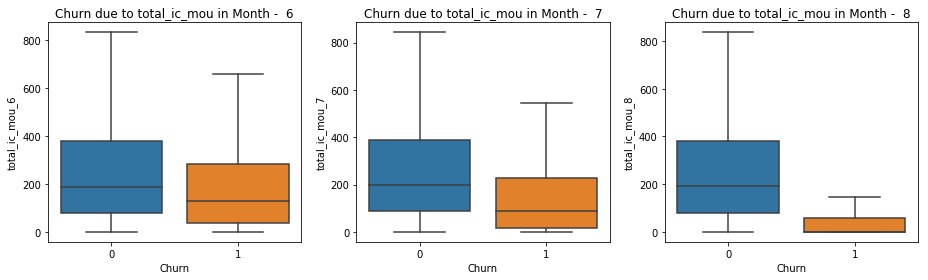

In [47]:
cols = ['arpu_6', 'arpu_7', 'arpu_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    #sns.barplot(telecom['Churn'], telecom[cols[i]])
    plt.title("Churn due to arpu in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()
    
cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    plt.title("Churn due to onnet_mou in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()
    
cols = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    plt.title("Churn due to offet_mou in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()
    
cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    plt.title("Churn due to total_og_mou in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()
    
cols = ['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    plt.title("Churn due to total_ic_mou in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()

From all the above graphs, we can interpret that tagged customers more likely to churn because:
- Average Revenue Per User is decreasing in 8th month
- On net Minute of Usage is also very less in 8th month
- Off net Minute of Usage is also very less in 8th month
- Total outgoing Minute of Usage is suddenly decreaesing in 8th month
- Total outgoing Minute of Usage is also suddenly decreaesing in 8th month

Let's plot few more graphs:

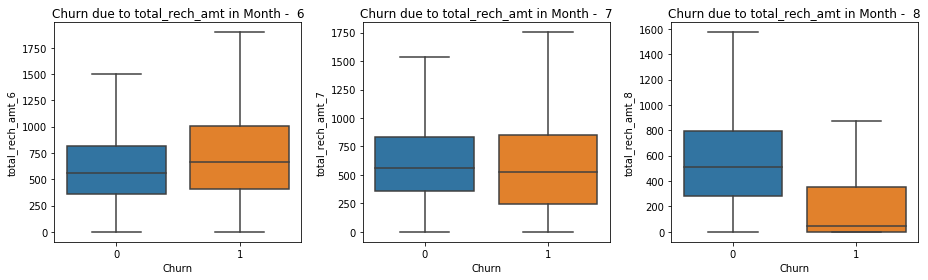

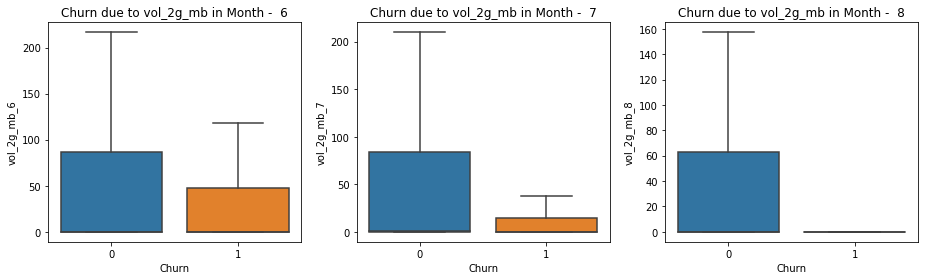

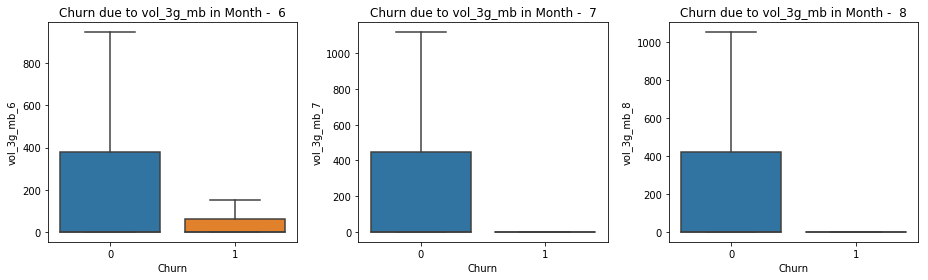

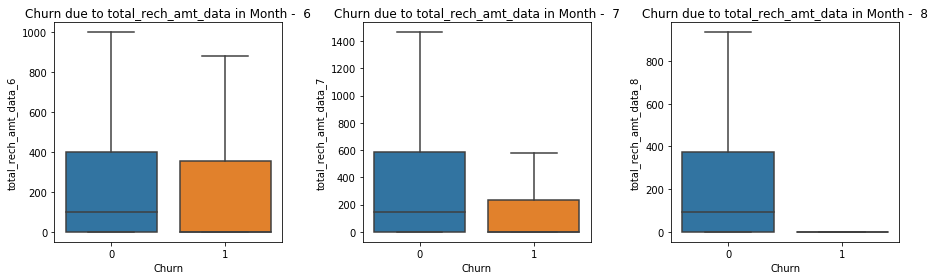

In [48]:
cols = ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    plt.title("Churn due to total_rech_amt in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()
    
cols = ['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    plt.title("Churn due to vol_2g_mb in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()

cols = ['vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    plt.title("Churn due to vol_3g_mb in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()

cols = ['total_rech_amt_data_6', 'total_rech_amt_data_7', 'total_rech_amt_data_8']
month = 6
plt.figure(figsize=(13,4))
for i in range(len(cols)):
    plt.subplot(1,3,i+1)
    sns.boxplot(telecom['Churn'], telecom[cols[i]], showfliers=False)
    plt.title("Churn due to total_rech_amt_data in Month - " + " " + str(month))
    month+=1
    plt.tight_layout()

From all the above graphs, we can interpret that tagged customers more likely to churn because:
- Total recharge amount is very less in 8th Month
- 2G internet usage volume is very low in 8th month
- 3G internet usage volume is very low in 8th month
- Total recharge amount for data is also very low in 8th month

So, these are the significant sign of churn.

##### Age on Network vs Churn:

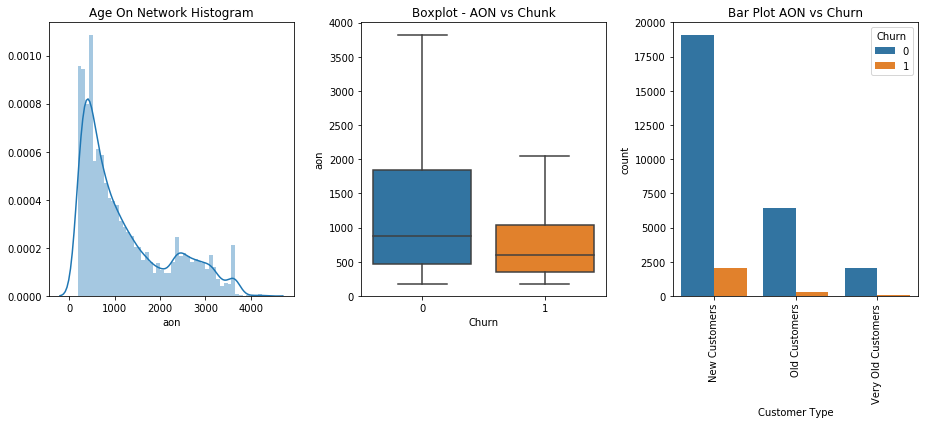

In [49]:
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
sns.distplot(telecom['aon'])
plt.title("Age On Network Histogram")

plt.subplot(1,3,2)
sns.boxplot(telecom['Churn'], telecom['aon'], showfliers=False)
plt.tight_layout()
plt.title("Boxplot - AON vs Chunk")
plt.subplots_adjust(wspace=0.5)

plt.subplot(1,3,3)
sns.countplot(telecom['Customer Type'], hue= telecom['Churn'])
plt.title("Bar Plot AON vs Churn")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Above graphs show that new customers are more likely to churn.

In [50]:
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn,Customer Type
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1,New Customers
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1,New Customers
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,1

## Step 5: Creating Dummy variables

The column `Customer Type` is a categorical column. Let's create dummy variable for this.

In [51]:
status = pd.get_dummies(telecom['Customer Type'], drop_first=True)
status.head()

,Old Customers,Very Old Customers
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


##### Concatenating original telecom dataframe with dummy one:

In [52]:
telecom = pd.concat([telecom, status], axis=1)

##### Dropping the main column `Customer Type` after dummy creation:

In [53]:
telecom = telecom.drop('Customer Type', axis=1)
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn,Old Customers,Very Old Customers
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,1,1,968,30.40,0.00,101.20,252.0,252.0,252.0,1,0,0
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1,0,0
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10

In [54]:
telecom.shape

(30001, 157)

## Step 6: Outlier Treatment

In [55]:
telecom.describe(percentiles=[0.01,0.25,0.5,0.75,0.95,0.98,0.99,0.999])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn,Old Customers,Very Old Customers
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.00000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,300

##### Separating few columns which don't require outlier treatment:

In [56]:
no_capping = telecom[['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','Old Customers','Very Old Customers']]
telecom = telecom.drop(columns=['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8','Old Customers','Very Old Customers'])
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,252.0,252.0,252.0,1
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,0.0,0.0,1
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0

In [57]:
telecom.shape

(30001, 149)

##### Treating outlier with capping:

In [58]:
for col in telecom.columns:
    percentiles = telecom[col].quantile([0.01,0.999]).values
    telecom[col] = np.clip(telecom[col], percentiles[0], percentiles[1])
    
telecom.describe(percentiles=[0.01,0.25,0.5,0.75,0.95,0.98,0.99,0.999])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000

In [59]:
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,252.0,252.0,252.0,1.0
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,1.0
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.

##### Concatenating capped data with the one which didn't requre outlier treatment:

In [60]:
telecom = pd.concat([telecom, no_capping], axis=1)
telecom.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,Churn,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,Old Customers,Very Old Customers
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,968.0,30.40,0.00,101.20,252.0,252.0,252.0,1.0,0,0,0,1,1,1,0,0
1,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,802.0,57.74,19.38,18.74,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0
2,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217

In [61]:
telecom.shape

(30001, 157)

## Step7: Splitting Train and Test Data

In [62]:
X = telecom.drop('Churn', axis = 1)
y = telecom['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

##### Getting shape of each Train and Test split:

In [63]:
print("X_train Shape: {}".format(X_train.shape))
print("X_test Shape: {}".format(X_test.shape))
print("y_train Shape: {}".format(y_train.shape))
print("y_test Shape: {}".format(y_test.shape))

X_train Shape: (21000, 156)
X_test Shape: (9001, 156)
y_train Shape: (21000,)
y_test Shape: (9001,)


## Step 8: Data Standardization

##### Getting continuous columns for scaling:

In [64]:
num_cocls = list(X_train.columns[(X_train.dtypes == 'int64') | (X_train.dtypes == 'float64')])

##### Standardizing the continuous columns:

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_cocls] = scaler.fit_transform(X_train[num_cocls])
X_test[num_cocls] = scaler.transform(X_test[num_cocls])

## Step 9: Model Building
We are going to build model in 2 parts. Below are the details:
- **Part I: Model with Interpretability (Using RFE)**
    - **Logistic Regression Model**




- **Part II: Models with Good Prediction (Using PCA)**
    - **Logistic Regression Model**
    - **Decision Tree Model**
    - **Random Forest Model**

## <u> <center> Part I: Model with Interpretability (Using RFE) </center> </u>

##### Applying logistic regression with RFE. Selecting 15 columns and handling class imbalance:

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression(class_weight='balanced')

rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False,  True, False, False, False, False, False,
        True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 51),
 ('arpu_7', False, 32),
 ('arpu_8', False, 16),
 ('onnet_mou_6', False, 50),
 ('onnet_mou_7', False, 88),
 ('onnet_mou_8', False, 28),
 ('offnet_mou_6', False, 23),
 ('offnet_mou_7', True, 1),
 ('offnet_mou_8', False, 17),
 ('roam_ic_mou_6', False, 121),
 ('roam_ic_mou_7', False, 73),
 ('roam_ic_mou_8', False, 115),
 ('roam_og_mou_6', False, 138),
 ('roam_og_mou_7', False, 10),
 ('roam_og_mou_8', False, 114),
 ('loc_og_t2t_mou_6', False, 62),
 ('loc_og_t2t_mou_7', False, 84),
 ('loc_og_t2t_mou_8', False, 75),
 ('loc_og_t2m_mou_6', False, 25),
 ('loc_og_t2m_mou_7', False, 134),
 ('loc_og_t2m_mou_8', False, 74),
 ('loc_og_t2f_mou_6', False, 90),
 ('loc_og_t2f_mou_7', False, 135),
 ('loc_og_t2f_mou_8', False, 123),
 ('loc_og_t2c_mou_6', False, 80),
 ('loc_og_t2c_mou_7', False, 133),
 ('loc_og_t2c_mou_8', False, 81),
 ('loc_og_mou_6', False, 61),
 ('loc_og_mou_7', False, 7),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 116),
 ('std_og_t2t_mou_7', False, 

##### Columns supported by RFE:

In [69]:
col = X_train.columns[rfe.support_]
col

Index(['offnet_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'std_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_7',
       'spl_ic_mou_8', 'vol_2g_mb_8', 'fb_user_8'],
      dtype='object')

##### Columns not supported by RFE:

In [70]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_8', 'roam_ic_mou_6',
       'roam_ic_mou_7',
       ...
       'total_rech_amt_data_6', 'total_rech_amt_data_7',
       'total_rech_amt_data_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'Old Customers',
       'Very Old Customers'],
      dtype='object', length=141)

### 1st Model:

In [71]:
X_train_sm = sm.add_constant(X_train[col])
logm_1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20984
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4060.5
Date:                Mon, 18 May 2020   Deviance:                       8120.9
Time:                        18:37:43   Pearson chi2:                 1.04e+06
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3359      0.079    -54.578      0.000      -4.492      -4.180
offnet_mou_7         0.3529      0.038      9.177      0.000       0.278       0.428
loc_og_mou_8        -1.2987      0.130     -9.953      0.000      -1.554      -1.043
std_og_t2t_mou_8    -1.3261      0.497     -2.670      0.008      -2.300      -0.353
std_og_t2m_mou_8    -1.6546      0.495     -3.344      0.001      -2.624      -0.685
std_og_mou_8         1.4325      0.754      1.900      0.057      -0.045       2.910
loc_ic_t2t_mou_6     0.4480      0.163      2.754      0.006       0.129       0.767
loc_ic_t2m_mou_6     0.6268      0.227      2.763      0.006       0.182       1.072
loc_ic_mou_6        -0.6071      0.304     -1.999      0.046      -1.203      -0.012
loc_ic_mou_7         0.4606      0.083      5.536      0.000       0.298       0.624
loc_ic_mou_8        -2.8075      0.175    -16.043      0.000      -3.150      -2.465
std_ic_t2m_mou_7    -0.1668      0.063     -2.657      0.008      -0.290      -0.044
std_ic_mou_7         0.1142      0.059      1.934      0.053      -0.002       0.230
spl_ic_mou_8        -0.5853      0.086     -6.819      0.000      -0.754      -0.417
vol_2g_mb_8         -0.4126      0.090     -4.568      0.000      -0.590      -0.236
fb_user_8           -0.8175      0.042    -19.320      0.000      -0.900      -0.735
====================================================================================
"""

##### Getting VIF:

In [72]:
def get_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif
get_vif()

,Features,VIF
4,std_og_mou_8,272.96
3,std_og_t2m_mou_8,119.31
2,std_og_t2t_mou_8,118.52
7,loc_ic_mou_6,37.70
6,loc_ic_t2m_mou_6,20.58
5,loc_ic_t2t_mou_6,9.98
8,loc_ic_mou_7,5.12
10,std_ic_t2m_mou_7,4.15
11,std_ic_mou_7,4.14
9,loc_ic_mou_8,3.87


##### Dropping the column "std_og_mou_8" as its p-value and VIF are very high:

In [73]:
col = col.drop('std_og_mou_8', 1)
col

Index(['offnet_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2m_mou_7', 'std_ic_mou_7', 'spl_ic_mou_8',
       'vol_2g_mb_8', 'fb_user_8'],
      dtype='object')

### 2nd Model:

In [74]:
X_train_sm = sm.add_constant(X_train[col])
logm_2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20985
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4061.5
Date:                Mon, 18 May 2020   Deviance:                       8123.1
Time:                        18:37:44   Pearson chi2:                 1.02e+06
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3337      0.079    -54.604      0.000      -4.489      -4.178
offnet_mou_7         0.3536      0.038      9.191      0.000       0.278       0.429
loc_og_mou_8        -1.2916      0.130     -9.913      0.000      -1.547      -1.036
std_og_t2t_mou_8    -0.3943      0.044     -8.994      0.000      -0.480      -0.308
std_og_t2m_mou_8    -0.7231      0.063    -11.480      0.000      -0.847      -0.600
loc_ic_t2t_mou_6     0.4446      0.162      2.736      0.006       0.126       0.763
loc_ic_t2m_mou_6     0.6219      0.227      2.744      0.006       0.178       1.066
loc_ic_mou_6        -0.6003      0.303     -1.978      0.048      -1.195      -0.006
loc_ic_mou_7         0.4584      0.083      5.510      0.000       0.295       0.621
loc_ic_mou_8        -2.8037      0.175    -16.028      0.000      -3.147      -2.461
std_ic_t2m_mou_7    -0.1767      0.062     -2.839      0.005      -0.299      -0.055
std_ic_mou_7         0.1271      0.058      2.186      0.029       0.013       0.241
spl_ic_mou_8        -0.5863      0.086     -6.829      0.000      -0.755      -0.418
vol_2g_mb_8         -0.4135      0.090     -4.576      0.000      -0.591      -0.236
fb_user_8           -0.8166      0.042    -19.298      0.000      -0.900      -0.734
====================================================================================
"""

##### Checking VIF:

In [75]:
get_vif()

,Features,VIF
6,loc_ic_mou_6,37.69
5,loc_ic_t2m_mou_6,20.58
4,loc_ic_t2t_mou_6,9.98
7,loc_ic_mou_7,5.12
9,std_ic_t2m_mou_7,4.15
10,std_ic_mou_7,4.14
8,loc_ic_mou_8,3.87
0,offnet_mou_7,2.35
3,std_og_t2m_mou_8,2.09
1,loc_og_mou_8,1.50


##### Dropping the column "loc_ic_mou_6" as its VIF is very high:

In [76]:
col = col.drop('loc_ic_mou_6', 1)
col

Index(['offnet_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_mou_7', 'spl_ic_mou_8', 'vol_2g_mb_8',
       'fb_user_8'],
      dtype='object')

### 3rd Model:

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm_3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial()).fit()
logm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21000
Model:                            GLM   Df Residuals:                    20986
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4063.6
Date:                Mon, 18 May 2020   Deviance:                       8127.1
Time:                        18:37:44   Pearson chi2:                 1.15e+06
No. Iterations:                     8   Covariance Type:             nonrobust
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -4.3299      0.079    -54.616      0.000      -4.485      -4.175
offnet_mou_7         0.3565      0.038      9.267      0.000       0.281       0.432
loc_og_mou_8        -1.2864      0.130     -9.888      0.000      -1.541      -1.031
std_og_t2t_mou_8    -0.3930      0.044     -8.972      0.000      -0.479      -0.307
std_og_t2m_mou_8    -0.7247      0.063    -11.501      0.000      -0.848      -0.601
loc_ic_t2t_mou_6     0.1405      0.049      2.895      0.004       0.045       0.236
loc_ic_t2m_mou_6     0.1837      0.051      3.588      0.000       0.083       0.284
loc_ic_mou_7         0.4474      0.084      5.348      0.000       0.283       0.611
loc_ic_mou_8        -2.8071      0.175    -16.043      0.000      -3.150      -2.464
std_ic_t2m_mou_7    -0.1748      0.062     -2.802      0.005      -0.297      -0.053
std_ic_mou_7         0.1245      0.058      2.135      0.033       0.010       0.239
spl_ic_mou_8        -0.5851      0.086     -6.820      0.000      -0.753      -0.417
vol_2g_mb_8         -0.4138      0.090     -4.578      0.000      -0.591      -0.237
fb_user_8           -0.8171      0.042    -19.312      0.000      -0.900      -0.734
====================================================================================
"""

##### Checking VIF:

In [78]:
get_vif()

,Features,VIF
6,loc_ic_mou_7,4.99
8,std_ic_t2m_mou_7,4.15
9,std_ic_mou_7,4.14
7,loc_ic_mou_8,3.87
0,offnet_mou_7,2.35
5,loc_ic_t2m_mou_6,2.17
3,std_og_t2m_mou_8,2.09
4,loc_ic_t2t_mou_6,1.63
1,loc_og_mou_8,1.50
12,fb_user_8,1.27


Now, all the p-values and VIF are in significant range. Let's build the model using these 13 columns.

In [79]:
col

Index(['offnet_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_mou_7', 'spl_ic_mou_8', 'vol_2g_mb_8',
       'fb_user_8'],
      dtype='object')

##### Applying logistic regression on those 13 features with balancing the class:

In [80]:
logreg_rfe = LogisticRegression(class_weight='balanced')
model_rfe = logreg_rfe.fit(X_train[col], y_train)

##### Getting coefficients:

In [81]:
model_rfe.coef_

array([[ 0.49044774, -1.29223706, -0.23758116, -0.70571999,  0.19672601,
         0.20945852,  0.49680791, -2.06135395, -0.18579333,  0.12207932,
        -0.4664573 , -0.38150716, -0.69610668]])

##### Getting predicted values on the training set:

In [82]:
y_train_pred = model_rfe.predict_proba(X_train[col])[:,1]
y_train_pred[:10]

array([6.61836950e-01, 5.61460358e-02, 4.71921702e-01, 5.90411281e-06,
       8.89576024e-02, 2.27055768e-01, 4.61118717e-02, 9.32624072e-02,
       4.48672086e-01, 4.06449211e-01])

##### Reshaping the predicted values:

In [83]:
y_train_pred = y_train_pred.reshape(-1)

##### Resetting index of y_train:

In [84]:
y_train.reset_index(drop=True, inplace=True)

##### Creating a Dtaframe with columns "Churn", "Churn_Prob":

In [85]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0.0,0.661837
1,0.0,0.056146
2,0.0,0.471922
3,0.0,0.000006
4,0.0,0.088958


##### Selecting a threshold value for the column "Churn_Prob" as 0.5 and creating a column "Predicted Churn" in the Dataframe which shows the value as 1 if Churn_Prob is geater than 0.5, else shows the value as 0:

In [86]:
y_train_pred_final['Predicted Churn'] = y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted Churn
0,0.0,0.661837,1
1,0.0,0.056146,0
2,0.0,0.471922,0
3,0.0,0.000006,0
4,0.0,0.088958,0


In [87]:
confusion_train = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted Churn'])
print(confusion_train)

[[15483  3826]
 [  339  1352]]


In [88]:
print("Accuracy: {}".format(metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted Churn'])))

Accuracy: 0.8016666666666666


In [89]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)

metrics = pd.DataFrame({'Sensitivity': [sensi], 'Specificity': [speci], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv})
metrics = metrics.T.rename(columns={0: 'Metrics'})
metrics

,Metrics
Sensitivity,0.799527
Specificity,0.801854
False Positive Rate,0.198146
Positive Predictive Value,0.261105
Negative Predictive Value,0.978574


### Plotting ROC Curve for Training Data:

In [90]:
from sklearn import metrics

def roc_curve(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Training')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'], drop_intermediate = False )

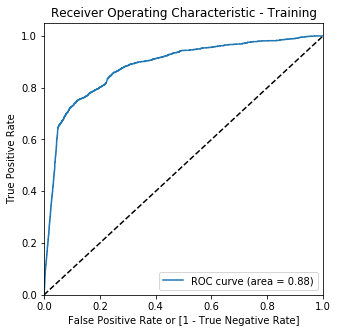

In [92]:
roc_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])

### Hyperparameter Optimization: Finding Optimal Cutoff Point

##### Creating columns with different probability cutoffs:

In [93]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.661837,1,1,1,1,1,1,1,1,0,0,0
1,0.0,0.056146,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.471922,0,1,1,1,1,1,0,0,0,0,0
3,0.0,0.000006,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.088958,0,1,0,0,0,0,0,0,0,0,0


##### Let's calculate the Accuracy, Sensitivity and Specificity for different probability cutoffs and put them in a Dataframe:

In [94]:
df_cutoff = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])

nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    conf_matrix = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i] )
    total = sum(sum(conf_matrix))
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/total
    
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])    
    df_cutoff.loc[i] =[i , accuracy, sensitivity, specificity]
df_cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.080524,1.000000,0.000000
0.1,0.1,0.362905,0.968658,0.309856
0.2,0.2,0.496476,0.947960,0.456937
0.3,0.3,0.607857,0.917800,0.580714
0.4,0.4,0.712905,0.886458,0.697706
0.5,0.5,0.801667,0.799527,0.801854
0.6,0.6,0.850143,0.761679,0.857890
0.7,0.7,0.894333,0.717327,0.909835
0.8,0.8,0.923952,0.471910,0.963540
0.9,0.9,0.922619,0.131283,0.991921


##### Plotting Accuracy, Sensitivity and Specificity for different probability:

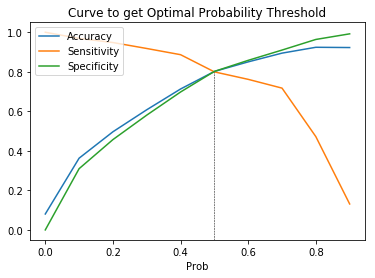

In [95]:
df_cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.axvline(x=0.50, ymax= 0.77, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Curve to get Optimal Probability Threshold")
plt.legend(loc='upper left')
plt.show()

**From the above curve , 0.5 is the optimum point to take it as a cutoff probability.**

##### Creating a columns "Final_Predicted" as per the new optimum probability value of 0.5:

In [96]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Churn_Prob'].map( lambda x: 1 if x > 0.50 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0.0,0.661837,1,1,1,1,1,1,1,1,0,0,0,1
1,0.0,0.056146,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.471922,0,1,1,1,1,1,0,0,0,0,0,0
3,0.0,0.000006,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.088958,0,1,0,0,0,0,0,0,0,0,0,0


In [97]:
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8016666666666666


In [98]:
confusion_new = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Final_Predicted'])
confusion_new

array([[15483,  3826],
       [  339,  1352]], dtype=int64)

In [99]:
TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

accuracy = metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_train_pred)


# Metrics Dataframe
metrics_train_rfe = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_train_rfe = metrics_train_rfe.T.rename(columns={0: 'Metrics_Training'})
round(metrics_train_rfe, 2)

,Metrics_Training
Accuracy,0.80
Sensitivity,0.80
Specificity,0.80
True Positive Rate,0.80
False Positive Rate,0.20
Positive Predictive Value,0.26
Negative Predictive Value,0.98
Misclassification Rate,0.20
Precision,0.26
Recall,0.80


### Making Prediction on Test Set:

In [100]:
y_test_pred = model_rfe.predict_proba(X_test[col])[:,1]
y_test_pred[:10]

array([0.73213152, 0.43045083, 0.04534981, 0.46226235, 0.86658812,
       0.09966024, 0.27104208, 0.11440103, 0.15889306, 0.32530714])

In [101]:
y_test_pred = y_test_pred.reshape(-1)
y_test = y_test.reset_index(drop=True)


y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()

,Churn,Churn_Prob
0,1.0,0.732132
1,1.0,0.430451
2,0.0,0.045350
3,0.0,0.462262
4,1.0,0.866588


##### Creating a columns "Final_Predicted" as per the  optimum probability value of 0.5:

In [102]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,Final_Predicted
0,1.0,0.732132,1
1,1.0,0.430451,0
2,0.0,0.045350,0
3,0.0,0.462262,0
4,1.0,0.866588,1


### Plotting the ROC Curve for Test Data:

In [103]:
def roc_curve_test(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating characteristic - Test')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [104]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final['Churn'], y_test_pred_final['Churn_Prob'], drop_intermediate = False )

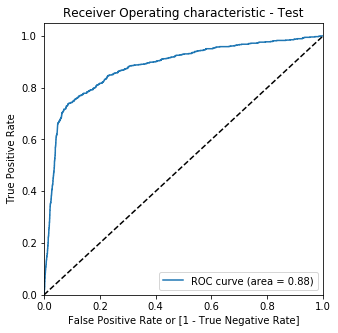

In [105]:
roc_curve_test(y_test_pred_final['Churn'], y_test_pred_final['Churn_Prob'])

In [106]:
accuracy_score=metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy_score))

Accuracy: 0.8085768247972448


In [107]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])
print(confusion_test)

[[6670 1581]
 [ 142  608]]


In [108]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_test_pred)


precision = precision_score(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])
recall = recall_score(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])

# Metrics Dataframe
metrics_test_rfe = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_test_rfe = metrics_test_rfe.T.rename(columns={0: 'Metrics_Test'})
metrics_test_rfe = pd.concat([metrics_train_rfe, metrics_test_rfe], axis=1)
round(metrics_test_rfe, 2)

,Metrics_Training,Metrics_Test
Accuracy,0.80,0.81
Sensitivity,0.80,0.81
Specificity,0.80,0.81
True Positive Rate,0.80,0.81
False Positive Rate,0.20,0.19
Positive Predictive Value,0.26,0.28
Negative Predictive Value,0.98,0.98
Misclassification Rate,0.20,0.19
Precision,0.26,0.28
Recall,0.80,0.81


We can see above Logistic Regression model gives good results.

##### Analysis of Feature Coefficients. Creating a new Dataframe with parameters of Model 3 and sorting in descending order:

In [109]:
feature_coef = logm_3.params[1:]
feature_coef_df = pd.DataFrame(feature_coef).reset_index()
feature_coef_df = feature_coef_df.rename(columns={'index':'Features', 0:'Coefficients'})
feature_coef_df = round(feature_coef_df.sort_values(by='Coefficients', ascending=False), 2)
feature_coef_df

,Features,Coefficients
6,loc_ic_mou_7,0.45
0,offnet_mou_7,0.36
5,loc_ic_t2m_mou_6,0.18
4,loc_ic_t2t_mou_6,0.14
9,std_ic_mou_7,0.12
8,std_ic_t2m_mou_7,-0.17
2,std_og_t2t_mou_8,-0.39
11,vol_2g_mb_8,-0.41
10,spl_ic_mou_8,-0.59
3,std_og_t2m_mou_8,-0.72


##### Plotting Bar Plot between Feature and Coefficients:

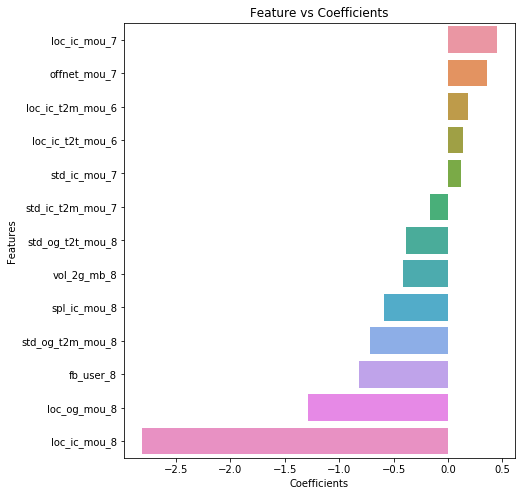

In [110]:
plt.figure(figsize=(7,8))
sns.barplot(y='Features', x='Coefficients', data=feature_coef_df)
plt.title("Feature vs Coefficients")
plt.show()

As per the analysis, below are the features which contribute in churning:
- #### Features with Positive Coefficient
    - loc_ic_mou_7
    - offnet_mou_7
    - loc_ic_t2m_mou_6
    - loc_ic_t2t_mou_6
    - std_ic_mou_7

- #### Features with Negative Coefficient
    - std_ic_t2m_mou_7
    - std_og_t2t_mou_8
    - vol_2g_mb_8
    - spl_ic_mou_8
    - std_og_t2m_mou_8
    - fb_user_8
    - loc_og_mou_8
    - loc_ic_mou_8
    
#### It means, below are the main 2 conclusion points:
-  The Churn probability increses with increase in value of the features with positive coefficient.
-  The Churn probability increses with decrease in value of the features with negative coefficient.   

## <u> <center> Part II: Models with Good Prediction (Using PCA) </center> </u>

## Principal Component Analysis:
Let's do PCA on the data and then create different models using Principal Components.

##### PCA Implementation:

In [111]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

##### Checking components:

In [112]:
pca.components_

array([[-6.08079016e-02, -6.24278615e-02, -4.81453186e-02, ...,
         1.47305561e-01, -6.86196315e-04, -6.35754961e-04],
       [ 1.51903628e-01,  1.64993739e-01,  1.70065359e-01, ...,
         2.18737185e-02,  1.61396994e-02,  6.32222993e-03],
       [ 8.76668492e-02,  1.19944711e-01,  1.02903999e-01, ...,
        -1.44965999e-02, -2.25104573e-02, -1.11643165e-02],
       ...,
       [ 4.19666133e-05, -6.11546783e-05, -2.48928007e-05, ...,
         6.94710746e-04, -1.47392010e-04, -4.56643960e-04],
       [-1.14383290e-04, -1.50754329e-04, -6.81273988e-06, ...,
         1.43192344e-04,  2.28018173e-04,  1.21451848e-04],
       [ 6.15045020e-05, -3.37133604e-05, -6.69471000e-05, ...,
         1.03331181e-06,  2.53232681e-05,  1.99058435e-05]])

##### Checking Variance Ratio:

In [113]:
pca.explained_variance_ratio_

array([1.20366933e-01, 9.80593481e-02, 6.60946678e-02, 5.53830687e-02,
       3.90111418e-02, 3.02020894e-02, 2.69192472e-02, 2.56066442e-02,
       2.28816446e-02, 2.25072823e-02, 2.10648270e-02, 2.02914020e-02,
       1.89404616e-02, 1.72178982e-02, 1.69254611e-02, 1.54503042e-02,
       1.52094753e-02, 1.45593886e-02, 1.38926263e-02, 1.32645480e-02,
       1.08621120e-02, 1.07952415e-02, 1.05923099e-02, 1.02136195e-02,
       1.00619018e-02, 8.97239124e-03, 8.80007716e-03, 8.57658458e-03,
       8.19561524e-03, 7.77268421e-03, 7.44260998e-03, 7.35510860e-03,
       7.18297347e-03, 7.06356278e-03, 6.36194057e-03, 6.20953734e-03,
       6.10759257e-03, 5.88415352e-03, 5.66727942e-03, 5.49664480e-03,
       5.47181117e-03, 5.28741333e-03, 5.08875708e-03, 4.99739985e-03,
       4.86298849e-03, 4.75310767e-03, 4.51226122e-03, 4.29763568e-03,
       4.18676499e-03, 4.12646951e-03, 4.01851066e-03, 3.94986371e-03,
       3.90173687e-03, 3.86378765e-03, 3.83031388e-03, 3.37399108e-03,
      

##### Computing cumulative sum of explained variance ratio:

In [114]:
cum_vari = np.cumsum(pca.explained_variance_ratio_)
cum_vari

array([0.12036693, 0.21842628, 0.28452095, 0.33990402, 0.37891516,
       0.40911725, 0.4360365 , 0.46164314, 0.48452479, 0.50703207,
       0.52809689, 0.5483883 , 0.56732876, 0.58454666, 0.60147212,
       0.61692242, 0.6321319 , 0.64669129, 0.66058391, 0.67384846,
       0.68471057, 0.69550581, 0.70609812, 0.71631174, 0.72637364,
       0.73534604, 0.74414611, 0.7527227 , 0.76091831, 0.768691  ,
       0.77613361, 0.78348872, 0.79067169, 0.79773525, 0.80409719,
       0.81030673, 0.81641432, 0.82229848, 0.82796575, 0.8334624 ,
       0.83893421, 0.84422162, 0.84931038, 0.85430778, 0.85917077,
       0.86392388, 0.86843614, 0.87273377, 0.87692054, 0.88104701,
       0.88506552, 0.88901538, 0.89291712, 0.89678091, 0.90061122,
       0.90398521, 0.90730971, 0.91034569, 0.91331202, 0.91622996,
       0.91909944, 0.92186898, 0.92461358, 0.92729243, 0.92983639,
       0.93231904, 0.9347938 , 0.93722792, 0.9396026 , 0.94178291,
       0.94389057, 0.94597566, 0.9479951 , 0.94999207, 0.95193

##### Plotting Scree Plot:

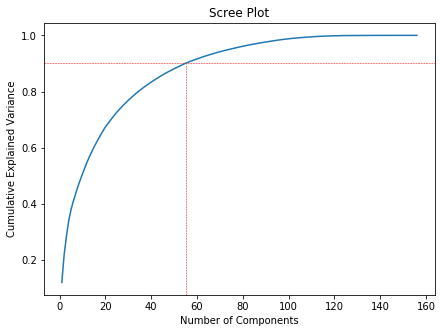

In [115]:
plt.figure(figsize=(7,5))
plt.plot(range(1, len(cum_vari)+1), cum_vari)
plt.axvline(x=55, ymax= 0.85, color= 'r', linestyle= '--', linewidth = 0.5)
plt.axhline(y=0.9, xmax= 55, color= 'r', linestyle= '--', linewidth = 0.5)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()

**As per the above Scree Plot, around 90% variance is being explained by 55 components. Let's apply PCA with 55 components now**

In [116]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=55)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(21000, 55)

##### Creating Correlation Matrix:

In [117]:
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat

array([[ 1.00000000e+00, -1.57355190e-09,  3.50329057e-07, ...,
         2.55318972e-06,  6.31128705e-05,  3.98592532e-05],
       [-1.57355190e-09,  1.00000000e+00, -8.13426490e-07, ...,
        -8.79221901e-05,  7.83484611e-06,  1.70777426e-05],
       [ 3.50329057e-07, -8.13426490e-07,  1.00000000e+00, ...,
        -1.68010713e-04,  2.40098722e-05,  1.78263945e-04],
       ...,
       [ 2.55318972e-06, -8.79221901e-05, -1.68010713e-04, ...,
         1.00000000e+00,  2.75041651e-03, -1.22038303e-02],
       [ 6.31128705e-05,  7.83484611e-06,  2.40098722e-05, ...,
         2.75041651e-03,  1.00000000e+00,  1.87476855e-03],
       [ 3.98592532e-05,  1.70777426e-05,  1.78263945e-04, ...,
        -1.22038303e-02,  1.87476855e-03,  1.00000000e+00]])

##### Visualizing Correlation Matrix through Heatmap:

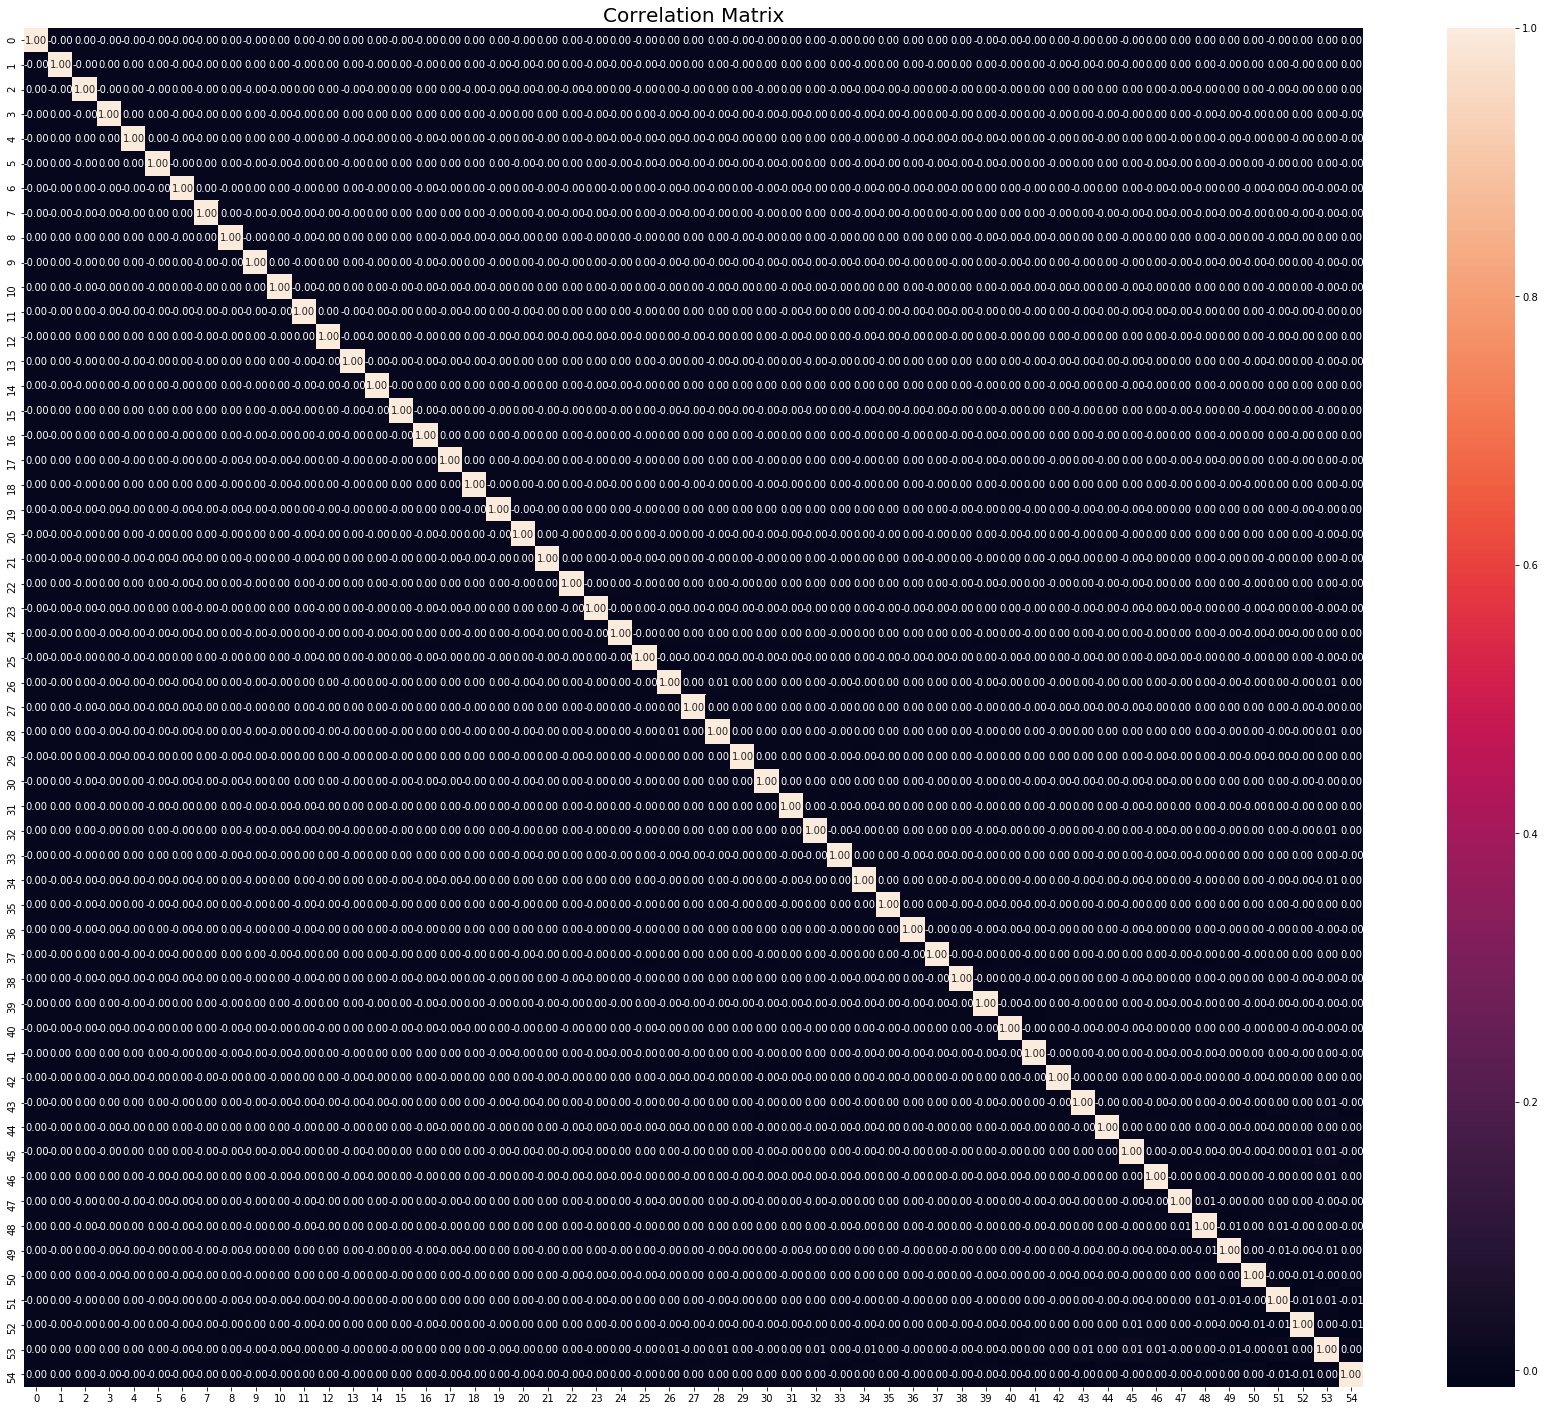

In [118]:
plt.figure(figsize=(30,25))
sns.heatmap(corrmat,annot = True, fmt='.2f')
plt.title("Correlation Matrix", fontsize=20)
plt.show()

As per the above heatmap, it is obvious that apart from the diagonal of the Correlation Matrix, other elements are 0.

##### Computing Correlation Matrix without diagonal values:

In [119]:
corrmat_without_diag = corrmat - np.diagflat(corrmat.diagonal())
corrmat_without_diag

array([[ 0.00000000e+00, -1.57355190e-09,  3.50329057e-07, ...,
         2.55318972e-06,  6.31128705e-05,  3.98592532e-05],
       [-1.57355190e-09,  0.00000000e+00, -8.13426490e-07, ...,
        -8.79221901e-05,  7.83484611e-06,  1.70777426e-05],
       [ 3.50329057e-07, -8.13426490e-07,  0.00000000e+00, ...,
        -1.68010713e-04,  2.40098722e-05,  1.78263945e-04],
       ...,
       [ 2.55318972e-06, -8.79221901e-05, -1.68010713e-04, ...,
         0.00000000e+00,  2.75041651e-03, -1.22038303e-02],
       [ 6.31128705e-05,  7.83484611e-06,  2.40098722e-05, ...,
         2.75041651e-03,  0.00000000e+00,  1.87476855e-03],
       [ 3.98592532e-05,  1.70777426e-05,  1.78263945e-04, ...,
        -1.22038303e-02,  1.87476855e-03,  0.00000000e+00]])

In [120]:
corrmat - corrmat.diagonal()

array([[ 0.        , -1.        , -0.99999965, ..., -0.99999745,
        -0.99993689, -0.99996014],
       [-1.        ,  0.        , -1.00000081, ..., -1.00008792,
        -0.99999217, -0.99998292],
       [-0.99999965, -1.00000081,  0.        , ..., -1.00016801,
        -0.99997599, -0.99982174],
       ...,
       [-0.99999745, -1.00008792, -1.00016801, ...,  0.        ,
        -0.99724958, -1.01220383],
       [-0.99993689, -0.99999217, -0.99997599, ..., -0.99724958,
         0.        , -0.99812523],
       [-0.99996014, -0.99998292, -0.99982174, ..., -1.01220383,
        -0.99812523,  0.        ]])

In [121]:
print('Max Corr: {}, Min Corr: {}'.format(round(corrmat_without_diag.max(), 2), round(corrmat_without_diag.min(), 2)))

Max Corr: 0.01, Min Corr: -0.01


We can see that correlations are really close to 0.

##### Applying Transformation on X_test:

In [122]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(9001, 55)

##  <u><center> Model 1: Logistic Regression with PCA </center></u>

##### Applying logistic regression on our Principal Component data handling class imbalance: 

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg_pca = LogisticRegression(class_weight='balanced')
model_pca = logreg_pca.fit(X_train_pca, y_train)

##### Getting coefficients:

In [124]:
model_pca.coef_

array([[-0.02841615, -0.27663232,  0.1869607 , -0.31451441,  0.00189828,
         0.05299692, -0.22384649, -0.35915905,  0.11843286,  0.01405112,
         0.30671221,  0.25399664, -0.05572807,  0.02998556, -0.11106853,
         0.07270633, -0.00677852,  0.20981864,  0.3470974 , -0.21812428,
         0.01321424, -0.1064049 ,  0.07528408,  0.0124568 ,  0.04820344,
        -0.07536946, -0.0142669 ,  0.10568809, -0.0264891 ,  0.31340519,
        -0.35872581,  0.09732218, -0.18304989, -0.04845823, -0.13439995,
        -0.22816862,  0.13349089, -0.47374334,  0.07290647, -0.01117388,
        -0.07643979, -0.31452434, -0.12665746,  0.17771759,  0.0996423 ,
        -0.23178311, -0.16293748,  0.01321543, -0.10625842,  0.08677155,
         0.10488435, -0.0027339 ,  0.01560611,  0.31896348,  0.15301048]])

##### Getting predicted values on the training set:

In [125]:
y_train_pred = model_pca.predict_proba(X_train_pca)[:,1]
y_train_pred[:10]

array([0.70748796, 0.08895847, 0.31795678, 0.00182116, 0.09945455,
       0.03033746, 0.27803064, 0.08022542, 0.16833588, 0.40124455])

##### Reshaping the predicted values:

In [126]:
y_train_pred = y_train_pred.reshape(-1)

##### Resetting index of y_train:

In [127]:
y_train.reset_index(drop=True, inplace=True)

##### Creating a Dtaframe with columns "Churn", "Churn_Prob":

In [128]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final.head()

,Churn,Churn_Prob
0,0.0,0.707488
1,0.0,0.088958
2,0.0,0.317957
3,0.0,0.001821
4,0.0,0.099455


##### Selecting a threshold value for the column "Churn_Prob" as 0.5 and creating a column "Predicted Churn" in the Dataframe which shows the value as 1 if Churn_Prob is geater than 0.5, else shows the value as 0:

In [129]:
y_train_pred_final['Predicted Churn'] = y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted Churn
0,0.0,0.707488,1
1,0.0,0.088958,0
2,0.0,0.317957,0
3,0.0,0.001821,0
4,0.0,0.099455,0


##### Confusion Matix:

In [130]:
confusion_train = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Predicted Churn'])
print(confusion_train)

[[15620  3689]
 [  277  1414]]


##### Checking Accuracy:

In [131]:
print("Accuracy: {}".format(metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Predicted Churn'])))

Accuracy: 0.8111428571428572


##### Metrics other than Accuracy in Traing Data Set:

In [132]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)

metrics = pd.DataFrame({'Sensitivity': [sensi], 'Specificity': [speci], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv})
metrics = metrics.T.rename(columns={0: 'Metrics'})
metrics

,Metrics
Sensitivity,0.836192
Specificity,0.808949
False Positive Rate,0.191051
Positive Predictive Value,0.277092
Negative Predictive Value,0.982575


### Plotting ROC Curve for Training Data:

In [133]:
from sklearn import metrics

def roc_curve(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score(actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic - Training')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [134]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'], drop_intermediate = False )

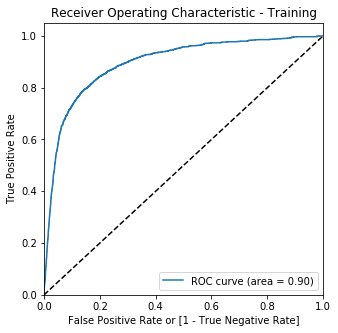

In [135]:
roc_curve(y_train_pred_final['Churn'], y_train_pred_final['Churn_Prob'])

### Hyperparameter Optimization: Finding Optimal Cutoff Point

##### Creating columns with different probability cutoffs:

In [136]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Churn_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.0,0.707488,1,1,1,1,1,1,1,1,1,0,0
1,0.0,0.088958,0,1,0,0,0,0,0,0,0,0,0
2,0.0,0.317957,0,1,1,1,1,0,0,0,0,0,0
3,0.0,0.001821,0,1,0,0,0,0,0,0,0,0,0
4,0.0,0.099455,0,1,0,0,0,0,0,0,0,0,0


##### Let's calculate the Accuracy, Sensitivity and Specificity for different probability cutoffs and put them in a Dataframe:

In [137]:
df_cutoff = pd.DataFrame(columns = ['Prob','Accuracy','Sensitivity','Specificity'])

nums = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in nums:
    conf_matrix = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final[i] )
    total = sum(sum(conf_matrix))
    accuracy = (conf_matrix[0,0]+conf_matrix[1,1])/total
    
    sensitivity = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    specificity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])    
    df_cutoff.loc[i] =[i , accuracy, sensitivity, specificity]
df_cutoff

,Prob,Accuracy,Sensitivity,Specificity
0.0,0.0,0.080524,1.000000,0.000000
0.1,0.1,0.413048,0.976345,0.363716
0.2,0.2,0.563238,0.949734,0.529390
0.3,0.3,0.668762,0.923122,0.646486
0.4,0.4,0.746524,0.885275,0.734373
0.5,0.5,0.811143,0.836192,0.808949
0.6,0.6,0.862714,0.777055,0.870216
0.7,0.7,0.897810,0.701952,0.914962
0.8,0.8,0.921000,0.570668,0.951681
0.9,0.9,0.924762,0.240095,0.984722


##### Plotting Accuracy, Sensitivity and Specificity for different probability:

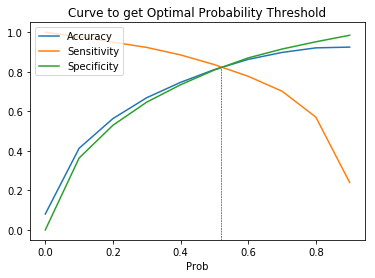

In [138]:
df_cutoff.plot.line(x='Prob', y=['Accuracy','Sensitivity','Specificity'])
plt.axvline(x=0.52, ymax= 0.79, color= 'k', linestyle= '--', linewidth = 0.5)
plt.title("Curve to get Optimal Probability Threshold")
plt.legend(loc='upper left')
plt.show()

**From the above curve , 0.52 is the optimum point to take it as a cutoff probability.**

##### Creating a columns "Final_Predicted" as per the new optimum probability value of 0.52:

In [139]:
y_train_pred_final['Final_Predicted'] = y_train_pred_final['Churn_Prob'].map( lambda x: 1 if x > 0.52 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,Predicted Churn,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Final_Predicted
0,0.0,0.707488,1,1,1,1,1,1,1,1,1,0,0,1
1,0.0,0.088958,0,1,0,0,0,0,0,0,0,0,0,0
2,0.0,0.317957,0,1,1,1,1,0,0,0,0,0,0,0
3,0.0,0.001821,0,1,0,0,0,0,0,0,0,0,0,0
4,0.0,0.099455,0,1,0,0,0,0,0,0,0,0,0,0


##### Checking Accuracy:

In [140]:
accuracy = metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy))

Accuracy: 0.8225238095238095


##### New Confusion matrix fo training:

In [141]:
confusion_new = metrics.confusion_matrix(y_train_pred_final['Churn'], y_train_pred_final['Final_Predicted'])
confusion_new

array([[15882,  3427],
       [  300,  1391]], dtype=int64)

##### Other Train Metrics:

In [142]:
TP = confusion_new[1,1] # true positive 
TN = confusion_new[0,0] # true negatives
FP = confusion_new[0,1] # false positives
FN = confusion_new[1,0] # false negatives

accuracy = metrics.accuracy_score(y_train_pred_final['Churn'], y_train_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_train_pred)


# Metrics Dataframe
metrics_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_train = metrics_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_train, 2)

,Metrics_Training
Accuracy,0.82
Sensitivity,0.82
Specificity,0.82
True Positive Rate,0.82
False Positive Rate,0.18
Positive Predictive Value,0.29
Negative Predictive Value,0.98
Misclassification Rate,0.18
Precision,0.29
Recall,0.82


### Making Prediction on Test Set:

In [143]:
y_test_pred = model_pca.predict_proba(X_test_pca)[:,1]
y_test_pred[:10]

array([0.67302945, 0.49675981, 0.0952143 , 0.3665736 , 0.85826244,
       0.11869522, 0.18714504, 0.07688882, 0.04647682, 0.42716169])

##### Reshaping predicted values, resetting index of y_test and creating a Dataframe with "Churn" and "Churn_Prob" columns for Test set:

In [144]:
y_test_pred = y_test_pred.reshape(-1)
y_test = y_test.reset_index(drop=True)


y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final.head()

,Churn,Churn_Prob
0,1.0,0.673029
1,1.0,0.496760
2,0.0,0.095214
3,0.0,0.366574
4,1.0,0.858262


##### Creating a columns "Final_Predicted" as per the  optimum probability value of 0.52:

In [145]:
y_test_pred_final['Final_Predicted'] = y_test_pred_final['Churn_Prob'].map(lambda x: 1 if x > 0.52 else 0)
y_test_pred_final.head()

,Churn,Churn_Prob,Final_Predicted
0,1.0,0.673029,1
1,1.0,0.496760,0
2,0.0,0.095214,0
3,0.0,0.366574,0
4,1.0,0.858262,1


### Plotting the ROC Curve for Test Data:

In [146]:
def roc_curve_test(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating characteristic - Test')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [147]:
fpr, tpr, thresholds = metrics.roc_curve(y_test_pred_final['Churn'], y_test_pred_final['Churn_Prob'], drop_intermediate = False )

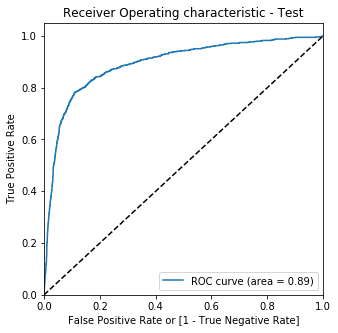

In [148]:
roc_curve_test(y_test_pred_final['Churn'], y_test_pred_final['Churn_Prob'])

In [149]:
accuracy_score=metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])
print("Accuracy: {}".format(accuracy_score))

Accuracy: 0.8319075658260193


##### Confusion Matrix for Test data:

In [150]:
confusion_test = metrics.confusion_matrix(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])
print(confusion_test)

[[6868 1383]
 [ 130  620]]


##### Other Test Metrics:

In [151]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = metrics.accuracy_score(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_test_pred)


precision = precision_score(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])
recall = recall_score(y_test_pred_final['Churn'], y_test_pred_final['Final_Predicted'])

# Metrics Dataframe
metrics_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_test = metrics_test.T.rename(columns={0: 'Metrics_Test'})
metrics_test = pd.concat([metrics_train, metrics_test], axis=1)
round(metrics_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,0.82,0.83
Sensitivity,0.82,0.83
Specificity,0.82,0.83
True Positive Rate,0.82,0.83
False Positive Rate,0.18,0.17
Positive Predictive Value,0.29,0.31
Negative Predictive Value,0.98,0.98
Misclassification Rate,0.18,0.17
Precision,0.29,0.31
Recall,0.82,0.83


## <u><center>Model 2: Decision Tree With PCA</center></u>

##### Applying Decision Tree method on our Principal Component data and handling class imbalance: 

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

dt_initial = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_initial.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

##### Getting predicted values on the training set:

In [153]:
y_pred_train = dt_initial.predict(X_train_pca)

##### Checking Classification Report:

In [154]:
print(classification_report(y_train, y_pred_train))

             precision    recall  f1-score   support

        0.0       0.98      0.78      0.86     19309
        1.0       0.23      0.78      0.36      1691

avg / total       0.92      0.78      0.82     21000



##### Confusion Matrix for Training: 

In [155]:
confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_train

array([[14982,  4327],
       [  368,  1323]], dtype=int64)

##### Checking Train Accuracy:

In [156]:
print("Accuracy: {}".format(accuracy_score(y_train, y_pred_train)))

Accuracy: 0.7764285714285715


##### Other Train Metrics:

In [157]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_train, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train)

# Metrics Dataframe:
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
metrics_dtree_train

,Metrics_Training
Accuracy,0.776429
Sensitivity,0.782377
Specificity,0.775908
True Positive Rate,0.782377
False Positive Rate,0.224092
Positive Predictive Value,0.234159
Negative Predictive Value,0.976026
Misclassification Rate,0.223571
Precision,0.234159
Recall,0.782377


##### Getting Predicted value on Test set:

In [158]:
y_pred_test = dt_initial.predict(X_test_pca)

##### Confusion Matrix for Test:

In [159]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[6375, 1876],
       [ 219,  531]], dtype=int64)

##### Checking Test Accuracy:

In [160]:
print("Accuracy: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy: 0.7672480835462726


##### Other Test Metrics:

In [161]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)
#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,0.78,0.77
Sensitivity,0.78,0.71
Specificity,0.78,0.77
True Positive Rate,0.78,0.71
False Positive Rate,0.22,0.23
Positive Predictive Value,0.23,0.22
Negative Predictive Value,0.98,0.97
Misclassification Rate,0.22,0.23
Precision,0.23,0.22
Recall,0.78,0.71


Let's tune the hyperparameter to get optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [162]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [163]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1)
tree.fit(X_train_pca, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:  5.1min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)

##### Scores of GridSearch CV:

In [164]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.152595,0.010944,0.000607,0.000802,1,{'max_depth': 1},0.919305,0.919524,0.919524,0.919524,0.919505,0.919476,0.000086,1,0.919519,0.919464,0.919464,0.919464,0.919469,0.919476,0.000021
1,0.266622,0.005808,0.002003,0.003105,2,{'max_depth': 2},0.919305,0.919524,0.919524,0.919524,0.919505,0.919476,0.000086,1,0.919519,0.919464,0.919464,0.919464,0.919469,0.919476,0.000021
2,0.392964,0.005066,0.002222,0.003014,3,{'max_depth': 3},0.919305,0.919048,0.919524,0.919524,0.918314,0.919143,0.000450,4,0.919817,0.919821,0.919464,0.919464,0.919826,0.919679,0.000175
3,0.508700,0.006093,0.001197,0.000977,4,{'max_depth': 4},0.919781,0.916905,0.917619,0.921905,0.916647,0.918571,0.001998,5,0.921662,0.922381,0.923393,0.922083,0.920779,0.922060,0.000858
4,0.623412,0.008065,0.000399,0.000798,5,{'max_depth': 5},0.921923,0.917381,0.919524,0.921667,0.916647,0.919429,0.002153,3,0.927198,0.925893,0.926071,0.924107,0.926731,0.926000,0.001055


##### Plotting Accuracies with max_depth:

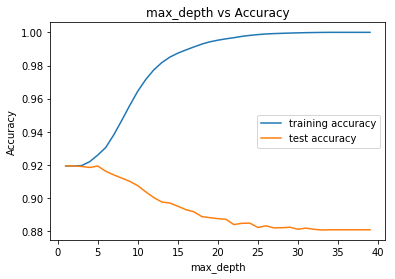

In [165]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both training and test score increase. After the value 5, the test score gradually reduces and train score increases. The model overfits the data at high value of max_depth.

#### (ii) min_samples_leaf Tuning:

In [166]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1)
tree.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [167]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.734277,0.117642,0.002202,3.771667e-04,5,{'min_samples_leaf': 5},0.897881,0.892619,0.898095,0.894048,0.893546,0.895238,0.002293,10,0.967260,0.967024,0.966310,0.967798,0.966371,0.966952,0.000560
1,1.420908,0.124244,0.001813,3.891948e-04,25,{'min_samples_leaf': 25},0.912402,0.912143,0.914524,0.912857,0.912122,0.912810,0.000897,9,0.934460,0.935119,0.935595,0.933155,0.936909,0.935048,0.001241
2,1.314096,0.116617,0.001800,4.078019e-04,45,{'min_samples_leaf': 45},0.920733,0.911667,0.915952,0.921667,0.914503,0.916905,0.003780,8,0.928508,0.928690,0.929940,0.927857,0.929647,0.928929,0.000764
3,1.239578,0.109743,0.001995,7.893059e-07,65,{'min_samples_leaf': 65},0.921685,0.915000,0.919286,0.925714,0.915932,0.919524,0.003909,3,0.926127,0.926607,0.926786,0.925774,0.925540,0.926167,0.000474
4,1.173630,0.121511,0.001197,7.465058e-04,85,{'min_samples_leaf': 85},0.922637,0.917143,0.920238,0.922143,0.918314,0.920095,0.002124,1,0.925234,0.924405,0.926548,0.925476,0.925481,0.925429,0.000685


##### Plotting Accuracies with min_samples_leaf:

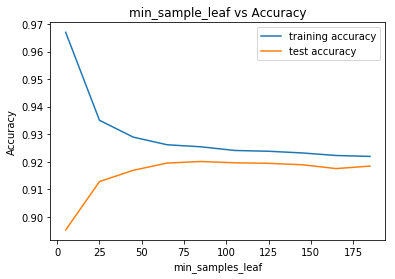

In [168]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.title("min_sample_leaf vs Accuracy")
plt.legend()
plt.show()

We can see that at low values of min_samples_leaf, the tree shows overfitting. After the value 50, the model becomes more stable and performs well.

#### (iii) min_samples_split Tuning:

In [169]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1)
tree.fit(X_train_pca, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

##### Scores of GridSearch CV :

In [170]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.994950,0.171618,0.002189,0.000401,5,{'min_samples_split': 5},0.885503,0.884524,0.885476,0.882143,0.882829,0.884095,0.001378,10,0.992976,0.993214,0.993512,0.992679,0.992739,0.993024,0.000309
1,2.103609,0.294896,0.002204,0.000395,25,{'min_samples_split': 25},0.898358,0.899048,0.894762,0.895238,0.890688,0.895619,0.002981,9,0.963629,0.962857,0.963512,0.961726,0.965478,0.963440,0.001222
2,1.960163,0.168690,0.002010,0.000018,45,{'min_samples_split': 45},0.904547,0.905714,0.905238,0.899048,0.899024,0.902714,0.003026,8,0.948390,0.950060,0.950238,0.949167,0.951312,0.949833,0.000993
3,1.966269,0.161287,0.001995,0.000606,65,{'min_samples_split': 65},0.907879,0.907143,0.905476,0.904762,0.897595,0.904571,0.003663,7,0.943330,0.943571,0.945000,0.942560,0.944408,0.943774,0.000851
4,2.044485,0.275259,0.002002,0.000617,85,{'min_samples_split': 85},0.911212,0.909286,0.908571,0.911190,0.904739,0.909000,0.002371,6,0.937853,0.938750,0.940714,0.938810,0.940599,0.939345,0.001124


##### Plotting Accuracies with min_samples_split:

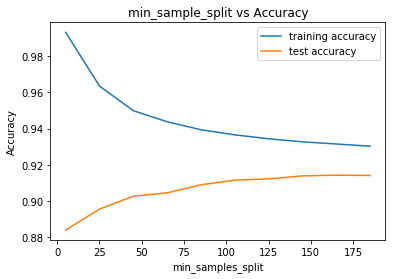

In [171]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.title("min_sample_split vs Accuracy")
plt.legend()
plt.show()

This shows that at low values, model overfits. As we increase the min_samples_split, the tree starts performing well after the value 50.

##### Grid Search to Find Optimal Hyperparameters:

In [172]:
# Create the parameter grid 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced', random_state = 100)
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, scoring="accuracy", verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

##### Cross Validation results:

In [173]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.148934,0.106075,0.001596,0.000488,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764818,0.749762,0.781905,0.725238,0.779233,0.760190,0.020909,7,0.766653,0.779405,0.782619,0.742083,0.786739,0.771500,0.016169
1,1.105415,0.044264,0.001610,0.000468,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.764818,0.749762,0.781905,0.725238,0.779233,0.760190,0.020909,7,0.766653,0.779405,0.782619,0.742083,0.786739,0.771500,0.016169
2,1.044456,0.024795,0.001789,0.000396,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.772435,0.741667,0.767857,0.723095,0.783996,0.757810,0.022209,11,0.775582,0.772024,0.769167,0.737262,0.792453,0.769297,0.017941
3,1.044533,0.033975,0.001406,0.000482,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.772435,0.741667,0.767857,0.723095,0.783996,0.757810,0.022209,11,0.775582,0.772024,0.769167,0.737262,0.792453,0.769297,0.017941
4,1.562424,0.031172,0.002002,0.000016,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.780290,0.790000,0.767381,0.780238,0.771374,0.777857,0.007884,1,0.806119,0.825714,0.793571,0.813214,0.802809,0.808286,0.010763


##### Printing the optimal accuracy score and hyperparameters:

In [174]:
print("Best Accuracy: {}".format(grid_search.best_score_))
print(grid_search.best_estimator_)

Best Accuracy: 0.7778571428571428
DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=10, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


##### Running the model with best parameters obtained from grid search:

In [175]:
# Model with optimal hyperparameters
dt_final = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
dt_final.fit(X_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

##### Getting predicted values on Training set:

In [176]:
y_pred_train_dt = dt_final.predict(X_train_pca)

##### Checking Classification Report for training:

In [177]:
print(classification_report(y_train, y_pred_train_dt))

             precision    recall  f1-score   support

        0.0       0.94      0.99      0.96     19309
        1.0       0.66      0.24      0.35      1691

avg / total       0.91      0.93      0.91     21000



##### Confusion Matrix for training:

In [178]:
confusion_train = confusion_matrix(y_train, y_pred_train_dt)
confusion_train

array([[19099,   210],
       [ 1291,   400]], dtype=int64)

##### Accuracy Score for training:

In [179]:
print("Accuracy_Score: {}".format(dt_final.score(X_train_pca, y_train)))

Accuracy_Score: 0.9285238095238095


##### Other Training Metrics:

In [180]:
TP = confusion_train[1,1] # true positive 
TN = confusion_train[0,0] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

accuracy = dt_final.score(X_train_pca, y_train)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train_dt)

# Metrics Dataframe
metrics_dtree_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_train = metrics_dtree_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_dtree_train, 2)

,Metrics_Training
Accuracy,0.93
Sensitivity,0.24
Specificity,0.99
True Positive Rate,0.24
False Positive Rate,0.01
Positive Predictive Value,0.66
Negative Predictive Value,0.94
Misclassification Rate,0.07
Precision,0.66
Recall,0.24


##### Making prediction on Test set:

In [181]:
y_pred_test_dt = dt_final.predict(X_test_pca)

##### Checking Classification Report for test:

In [182]:
print(classification_report(y_test, y_pred_test_dt))

             precision    recall  f1-score   support

        0.0       0.93      0.98      0.96      8251
        1.0       0.51      0.18      0.27       750

avg / total       0.90      0.92      0.90      9001



##### Confusion Matrix for test:

In [183]:
confusion_test = confusion_matrix(y_test, y_pred_test_dt)
confusion_test

array([[8120,  131],
       [ 612,  138]], dtype=int64)

##### Accuracy Score for test:

In [184]:
print("Accuracy_Score: {}".format(dt_final.score(X_test_pca, y_test)))

Accuracy_Score: 0.9174536162648594


##### Other Test Metrics:

In [185]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

accuracy = dt_final.score(X_test_pca, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_dt)

#Metrics Dataframe
metrics_dtree_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_dtree_test = metrics_dtree_test.T.rename(columns={0: 'Metrics_Test'})
metrics_dtree_test = pd.concat([metrics_dtree_train, metrics_dtree_test], axis=1)
round(metrics_dtree_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,0.93,0.92
Sensitivity,0.24,0.18
Specificity,0.99,0.98
True Positive Rate,0.24,0.18
False Positive Rate,0.01,0.02
Positive Predictive Value,0.66,0.51
Negative Predictive Value,0.94,0.93
Misclassification Rate,0.07,0.08
Precision,0.66,0.51
Recall,0.24,0.18


## <u><center>Model 3: Random Forest with PCA</center></u>

##### Applying Random Forest method on our Principal Component data and handling class imbalance: 

In [186]:
from sklearn.ensemble import RandomForestClassifier
rfc_initial = RandomForestClassifier(class_weight='balanced')
rfc_initial.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

##### Getting predicted values on Training set:

In [187]:
y_pred_train = rfc_initial.predict(X_train_pca)

##### Confusion Matrix:

In [188]:
confusion_train = confusion_matrix(y_train, y_pred_train)
confusion_train

array([[19307,     2],
       [  230,  1461]], dtype=int64)

##### Checking Train Accuracy:

In [189]:
print("Accuracy_Score: {}".format(accuracy_score(y_train, y_pred_train)))

Accuracy_Score: 0.9889523809523809


##### Other Training Metrics:

In [190]:
TN = confusion_train[0,0] # true positive 
TP = confusion_train[1,1] # true negatives
FP = confusion_train[0,1] # false positives
FN = confusion_train[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_train, y_pred_train)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
round(metrics_rf_train, 2)

,Metrics_Training
Accuracy,0.99
Sensitivity,0.86
Specificity,1.00
True Positive Rate,0.86
False Positive Rate,0.00
Positive Predictive Value,1.00
Negative Predictive Value,0.99
Misclassification Rate,0.01
Precision,1.00
Recall,0.86


##### Getting predicted values on Test set:

In [191]:
y_pred_test = rfc_initial.predict(X_test_pca)

##### Confusion Matrix for Test:

In [192]:
confusion_test = confusion_matrix(y_test, y_pred_test)
confusion_test

array([[8191,   60],
       [ 670,   80]], dtype=int64)

##### Checking Test Accuracy:

In [193]:
print("Accuracy_Score: {}".format(accuracy_score(y_test, y_pred_test)))

Accuracy_Score: 0.9188979002333074


##### Other Test Metrics:

In [194]:
TN = confusion_test[0,0] # true positive 
TP = confusion_test[1,1] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
accuracy = accuracy_score(y_test, y_pred_test)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,0.99,0.92
Sensitivity,0.86,0.11
Specificity,1.00,0.99
True Positive Rate,0.86,0.11
False Positive Rate,0.00,0.01
Positive Predictive Value,1.00,0.57
Negative Predictive Value,0.99,0.92
Misclassification Rate,0.01,0.08
Precision,1.00,0.57
Recall,0.86,0.11


Let's tune hyperparameters to het optimized results.

### Hyperparameter Optimization:
Let's tune `max_depth`, `n_estimators`, `max_features`, `min_samples_leaf` and `min_samples_split`.

#### (i) max_depth Tuning:

In [195]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

##### Scores of GridSearch CV:

In [196]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.265305,0.007311,0.004989,0.000024,2,{'max_depth': 2},0.772911,0.736429,0.752143,0.698333,0.731126,0.738190,0.024666,4,0.765938,0.748690,0.750952,0.706964,0.746741,0.743857,0.019650
1,0.701686,0.003321,0.007165,0.000388,7,{'max_depth': 7},0.872173,0.863095,0.870714,0.871905,0.859252,0.867429,0.005272,3,0.886660,0.893393,0.893095,0.890298,0.889292,0.890548,0.002504
2,0.938275,0.013687,0.008977,0.000635,12,{'max_depth': 12},0.912640,0.904048,0.918333,0.913095,0.911169,0.911857,0.004595,2,0.959998,0.960238,0.960536,0.956667,0.961550,0.959798,0.001652
3,0.999326,0.014953,0.008778,0.000399,17,{'max_depth': 17},0.924304,0.910714,0.920476,0.924524,0.917838,0.919571,0.005083,1,0.981249,0.979345,0.978214,0.977440,0.981251,0.979500,0.001552


##### Plotting Accuracies with max_depth:

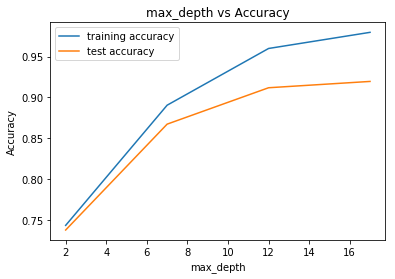

In [197]:
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.title("max_depth vs Accuracy")
plt.legend()
plt.show()

We can see that as we increase the value of max_depth, both train and test scores gradually increase till a point, but after that test score starts to decrease.

#### (ii) n_estimators Tuning:

In [198]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1)
rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 20.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [199]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.706719,0.161514,0.068410,0.002060,100,{'n_estimators': 100},0.915258,0.904762,0.913571,0.911905,0.905454,0.910190,0.004289,4,0.952259,0.954583,0.951905,0.950417,0.954824,0.952798,0.001676
1,43.597994,0.409119,0.346076,0.032470,500,{'n_estimators': 500},0.913354,0.902857,0.914762,0.915238,0.907121,0.910667,0.004867,3,0.952200,0.954702,0.953750,0.952738,0.955241,0.953726,0.001145
2,78.583862,2.274661,0.583295,0.008475,900,{'n_estimators': 900},0.914068,0.902143,0.915000,0.915000,0.907359,0.910714,0.005152,2,0.951961,0.955417,0.953869,0.952440,0.955122,0.953762,0.001385
3,110.970381,2.713456,0.839581,0.017180,1300,{'n_estimators': 1300},0.913116,0.903333,0.914524,0.915476,0.908312,0.910952,0.004537,1,0.951664,0.955595,0.953333,0.951964,0.955538,0.953619,0.001687


##### Plotting Accuracies with n_estimators:

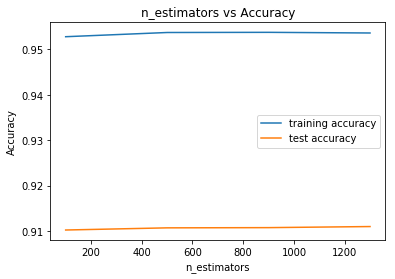

In [200]:
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")
plt.legend()
plt.show()

#### (iii) max_features Tuning:

In [201]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4, class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose = 1)
rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   23.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=4, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': [4, 8, 14, 20, 24]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [202]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.283043,0.003301,0.006000,0.000018,4,{'max_features': 4},0.829088,0.803333,0.820000,0.807619,0.802572,0.812524,0.010372,5,0.828680,0.817500,0.831310,0.820357,0.816201,0.822810,0.006076
1,0.511232,0.002998,0.005595,0.000478,8,{'max_features': 8},0.810759,0.814286,0.831429,0.814048,0.821624,0.818429,0.007408,3,0.805048,0.834345,0.835774,0.828274,0.835605,0.827809,0.011707
2,0.930796,0.052920,0.007181,0.001595,14,{'max_features': 14},0.820519,0.800714,0.833333,0.827143,0.817576,0.819857,0.011016,2,0.813858,0.817143,0.835357,0.837857,0.837688,0.828381,0.010605
3,1.237778,0.078517,0.006375,0.001013,20,{'max_features': 20},0.830279,0.795476,0.825952,0.836905,0.811860,0.820095,0.014795,1,0.828502,0.817560,0.837143,0.835714,0.828760,0.829536,0.006945
4,1.530895,0.145734,0.007189,0.002388,24,{'max_features': 24},0.827422,0.816190,0.821190,0.827381,0.798047,0.818048,0.010847,4,0.822549,0.830952,0.828214,0.836488,0.815785,0.826798,0.007106


##### Plotting Accuracies with max_features:

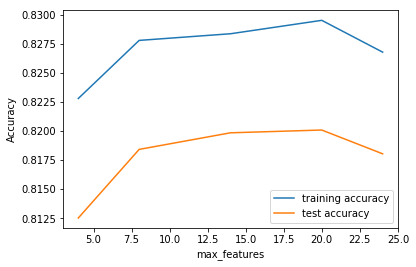

In [203]:
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (iv) min_samples_leaf Tuning:

In [204]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1)
rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   19.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [205]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.730846,0.015907,0.007788,0.000738,100,{'min_samples_leaf': 100},0.854320,0.840238,0.853095,0.857619,0.848774,0.850810,0.005997,1,0.861242,0.861786,0.864286,0.867857,0.863937,0.863821,0.002337
1,0.659250,0.012819,0.007168,0.000391,150,{'min_samples_leaf': 150},0.841228,0.831190,0.844524,0.840714,0.826149,0.836762,0.006921,2,0.845288,0.851012,0.853393,0.852024,0.843402,0.849024,0.003939
2,0.648703,0.030229,0.007785,0.001315,200,{'min_samples_leaf': 200},0.843133,0.821667,0.830238,0.831190,0.831627,0.831571,0.006837,3,0.845229,0.837500,0.845952,0.833512,0.846497,0.841738,0.005258
3,0.601444,0.021857,0.006790,0.000402,250,{'min_samples_leaf': 250},0.828850,0.810714,0.828333,0.813810,0.814956,0.819333,0.007688,4,0.833502,0.833512,0.832560,0.821607,0.828344,0.829905,0.004567
4,0.570275,0.006520,0.006382,0.000490,300,{'min_samples_leaf': 300},0.807665,0.810952,0.814762,0.809048,0.819481,0.812381,0.004277,6,0.813501,0.826131,0.824524,0.815179,0.831915,0.822250,0.006931


##### Plotting Accuracies with min_samples_leaf:

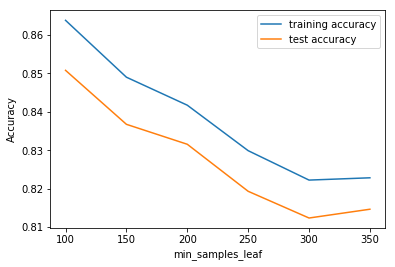

In [206]:
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### (v) min_samples_split Tuning:

In [207]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", verbose=1)
rf.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   24.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

##### Scores of GridSearch CV:

In [208]:
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.863092,0.014557,0.007787,0.000403,200,{'min_samples_split': 200},0.869079,0.868571,0.863095,0.876667,0.867826,0.869048,0.004364,1,0.889041,0.893869,0.887083,0.889405,0.893994,0.890679,0.002771
1,0.828725,0.018010,0.007195,0.000374,250,{'min_samples_split': 250},0.862176,0.852381,0.861905,0.859286,0.858300,0.858810,0.003542,2,0.876778,0.880655,0.877679,0.875060,0.874650,0.876964,0.002152
2,0.794148,0.019941,0.005977,0.003021,300,{'min_samples_split': 300},0.857891,0.852143,0.862619,0.852143,0.846154,0.854190,0.005616,3,0.868087,0.875476,0.869643,0.869821,0.872746,0.871155,0.002634
3,0.781716,0.015195,0.006990,0.000028,350,{'min_samples_split': 350},0.854082,0.841667,0.845952,0.841905,0.845201,0.845762,0.004500,4,0.859218,0.858274,0.862798,0.860060,0.864115,0.860893,0.002208
4,0.759784,0.017863,0.006981,0.000001,400,{'min_samples_split': 400},0.838848,0.834286,0.847381,0.843095,0.838057,0.840333,0.004500,6,0.848920,0.854881,0.863333,0.856131,0.851616,0.854976,0.004882


##### Plotting Accuracies with min_samples_split:

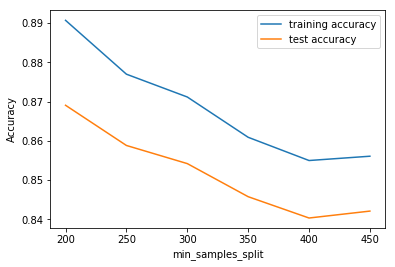

In [209]:
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

##### Grid Search to Find Optimal Hyperparameters:

In [210]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 28.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

##### Optimal Accuracy Score:

In [211]:
print("Best Accuracy: {}".format(grid_search.best_score_))

Best Accuracy: 0.8690952380952381


##### Optimal Hyperparameters:

In [212]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 200,
 'n_estimators': 200}

In [213]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

##### Running the model with best parameters obtained from grid search:

In [214]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,
                             class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=200, random_state=100)
rfc_final.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features=5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=200, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

##### Getting predicted values on Training set:

In [215]:
y_pred_train_rf = rfc_final.predict(X_train_pca)

##### Getting Classification Report for Training:

In [216]:
print(classification_report(y_train, y_pred_train_rf))

             precision    recall  f1-score   support

        0.0       0.98      0.88      0.93     19309
        1.0       0.38      0.81      0.52      1691

avg / total       0.93      0.88      0.90     21000



##### Confusion Matrix for training:

In [217]:
confusion_train_rf = confusion_matrix(y_train, y_pred_train_rf)
confusion_train_rf

array([[17081,  2228],
       [  314,  1377]], dtype=int64)

##### Checking Training Accuracy:

In [218]:
print("Accuracy_Score: {}".format(rfc_final.score(X_train_pca, y_train)))

Accuracy_Score: 0.8789523809523809


##### Other Training Metrics:

In [219]:
TP = confusion_train_rf[1,1] # true positive 
TN = confusion_train_rf[0,0] # true negatives
FP = confusion_train_rf[0,1] # false positives
FN = confusion_train_rf[1,0] # false negatives

accuracy = rfc_final.score(X_train_pca, y_train)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_train, y_pred_train_rf)

#Metrics Dataframe
metrics_rf_train = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_train = metrics_rf_train.T.rename(columns={0: 'Metrics_Training'})
metrics_rf_train

,Metrics_Training
Accuracy,0.878952
Sensitivity,0.814311
Specificity,0.884613
True Positive Rate,0.814311
False Positive Rate,0.115387
Positive Predictive Value,0.381969
Negative Predictive Value,0.981949
Misclassification Rate,0.121048
Precision,0.381969
Recall,0.814311


##### Making prediction on Test:

In [220]:
y_pred_test_rf = rfc_final.predict(X_test_pca)

##### Getting Classification Report for Test:

In [221]:
print(classification_report(y_test, y_pred_test_rf))

             precision    recall  f1-score   support

        0.0       0.97      0.88      0.93      8251
        1.0       0.37      0.75      0.49       750

avg / total       0.92      0.87      0.89      9001



##### Confusion Matrix for Test:

In [222]:
confusion_test_rf = confusion_matrix(y_test, y_pred_test_rf)
confusion_test_rf

array([[7284,  967],
       [ 191,  559]], dtype=int64)

##### Checking Test Accuracy:

In [223]:
print("Accuracy_Score: {}".format(rfc_final.score(X_test_pca, y_test)))

Accuracy_Score: 0.8713476280413287


##### Other Test Metrics:

In [224]:
TP = confusion_test_rf[1,1] # true positive 
TN = confusion_test_rf[0,0] # true negatives
FP = confusion_test_rf[0,1] # false positives
FN = confusion_test_rf[1,0] # false negatives

accuracy = rfc_final.score(X_test_pca, y_test)
sensi = TP / float(TP+FN)
speci = TN / float(TN+FP)
FPR = FP/ float(TN+FP)
TPR = TP/float(TP+FN)
ppv = TP / float(TP+FP)
npv = TN / float(TN+ FN)
missclass_rate = (FN+FP)/(TP+TN+FP+FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
auc = metrics.roc_auc_score(y_test, y_pred_test_rf)

#Metrics Dataframe
metrics_rf_test = pd.DataFrame({'Accuracy': [accuracy], 'Sensitivity': [sensi], 'Specificity': [speci], 'True Positive Rate': [TPR], 'False Positive Rate': [FPR], 'Positive Predictive Value': [ppv], 'Negative Predictive Value': npv, 'Misclassification Rate': [missclass_rate], 'Precision': [precision], 'Recall': [recall], 'AUC': [auc]})
metrics_rf_test = metrics_rf_test.T.rename(columns={0: 'Metrics_Test'})
metrics_rf_test = pd.concat([metrics_rf_train, metrics_rf_test], axis=1)
round(metrics_rf_test, 2)

,Metrics_Training,Metrics_Test
Accuracy,0.88,0.87
Sensitivity,0.81,0.75
Specificity,0.88,0.88
True Positive Rate,0.81,0.75
False Positive Rate,0.12,0.12
Positive Predictive Value,0.38,0.37
Negative Predictive Value,0.98,0.97
Misclassification Rate,0.12,0.13
Precision,0.38,0.37
Recall,0.81,0.75


### Overall Comparison:

In [225]:
metrics_test_rfe = metrics_test_rfe.rename(columns={'Metrics_Test': 'Logistic Regression with RFE'})
metrics_test = metrics_test.rename(columns={'Metrics_Test': 'Logistic Regression with PCA'})
metrics_dtree_test = metrics_dtree_test.rename(columns={'Metrics_Test': 'Decision Tree'})
metrics_rf_test = metrics_rf_test.rename(columns={'Metrics_Test': 'Random Forest'})
overall_metrics = pd.concat([metrics_test_rfe['Logistic Regression with RFE'], metrics_test['Logistic Regression with PCA'], metrics_dtree_test['Decision Tree'], metrics_rf_test['Random Forest']], axis=1)
round(overall_metrics, 2)

,Logistic Regression with RFE,Logistic Regression with PCA,Decision Tree,Random Forest
Accuracy,0.81,0.83,0.92,0.87
Sensitivity,0.81,0.83,0.18,0.75
Specificity,0.81,0.83,0.98,0.88
True Positive Rate,0.81,0.83,0.18,0.75
False Positive Rate,0.19,0.17,0.02,0.12
Positive Predictive Value,0.28,0.31,0.51,0.37
Negative Predictive Value,0.98,0.98,0.93,0.97
Misclassification Rate,0.19,0.17,0.08,0.13
Precision,0.28,0.31,0.51,0.37
Recall,0.81,0.83,0.18,0.75


## Model Selection Recomendation

The above table shows a clear comparision of all the four models. Based on this table, below are the points which help us decide on which model to recommend:

- Decision Tree model is the least stale among all models as it's sensitivity is too low at 18%.
- For the given dataset, Random Forest model has better performance compared to Decision Tree with PCA.
- Logistic Regression with RFE and Logistic Regression with PCA both perform good, though the one with PCA is slightly better.
- True Positive Rate of Logistic Regression with PCA is best (83%).
- As per overall analysis, Logistic Regression model with PCA is the best as it's sensitivity is 83% and AUC is 89%.

<b>So as per our findings, we recommend using Logistic Regression model with PCA as it is best among all our models. It overall has the best balance of stability, accuracy and complexity (variance/bias well controlled).</b>